In [1]:
#importing the necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the datasets

In [4]:
df=pd.read_csv('Data_Sets/Student_data.csv')

In [5]:
#Data exploration and the initial inspection

In [6]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0    KEC   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1    KEC   F   17       U     GT3       T     1     1  at_home       NaN  ...   
2    KEC   F   15       U     LE3       T     1     1  at_home     other  ...   
3    KEC   F   15       U     GT3       T     4     2   health  services  ...   
4    KEC   F   16       U     GT3       T     3     3      NaN     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  G3  
0       no       no     4.0       3.0      4    1    1      3        4  11  
1      yes       no     5.0       3.0      3    1    1      3        2  11  
2      yes       no     NaN       NaN      2    2    3      3        6  12  
3      yes      yes     3.0       2.0      2    1    1      5        0  14  
4       no       no     NaN       3.0      2    1    2      5        0  13  

[5 rows x 31 columns]

In [7]:
!pip install seaborn

In [8]:
#information about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        647 non-null    object 
 9   Fjob        646 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [10]:
df.select_dtypes(include=['category','object'])

school sex address famsize Pstatus      Mjob      Fjob  reason guardian  \
0      KEC   F       U     GT3       A   at_home   teacher  course   mother   
1      KEC   F       U     GT3       T   at_home       NaN  course   father   
2      KEC   F       U     LE3       T   at_home     other   other   mother   
3      KEC   F       U     GT3       T    health  services    home   mother   
4      KEC   F       U     GT3       T       NaN     other    home   father   
..     ...  ..     ...     ...     ...       ...       ...     ...      ...   
644    KEC   F       R     GT3       T  services     other  course   mother   
645    KEC   F       U     LE3       T   teacher  services  course   mother   
646    KEC   F       U     GT3       T     other     other  course   mother   
647    KEC   M       U     LE3       T  services  services  course   mother   
648    KEC   M       R     LE3       T  services     other  course   mother   

    schoolsup famsup paid activities nursery higher internet romantic  
0         yes     no   no         no     yes    yes       no       no  
1          no    yes   no         no      no    yes      yes       no  
2         yes     no   no         no     yes    yes      yes       no  
3          no    yes   no        yes     yes    yes      yes      yes  
4          no    yes   no         no     yes    yes       no       no  
..        ...    ...  ...        ...     ...    ...      ...      ...  
644        no     no   no        yes      no    yes      yes       no  
645        no    yes   no         no     yes    yes      yes       no  
646        no     no   no        yes     yes    yes       no       no  
647        no     no   no         no      no    yes      yes       no  
648        no     no   no         no      no    yes      yes       no  

[649 rows x 17 columns]

In [11]:
df.select_dtypes(include=['category','object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [12]:
df.select_dtypes(include=['category','Int64']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [13]:
df.select_dtypes(include=['category','float']).columns

Index(['famrel', 'freetime'], dtype='object')

In [14]:
#describe the summary of the datasets

In [15]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  646.000000  648.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930341    3.180556    3.184900    1.502311    2.280431    3.536210   
std      0.957925    1.051881    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G3  
count  649.000000  649.000000  
mean     3.659476   11.906009  
std      4.640759    3.230656  
min      0.000000    0.000000  
25%      0.000000   10.000000  
50%      2.000000   12.000000  
75%      6.000000   14.000000  
max     32.000000   19.000000

In [16]:
#visuALIZATION OF shape of the data

In [17]:
df.shape #(row,column)

(649, 31)

In [18]:
#vision over a columns in a database

In [19]:
list(df.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

# handling missing values

# finding the missing columns

In [20]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          2
Fjob          3
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        3
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

# listing the categorical and numerical columns

In [21]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

# Filling the missing values in a categorical columns with mode

# Before missing values in a categorical columns

In [22]:
df[categorical_columns].isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          2
Fjob          3
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

In [23]:
df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [24]:
df[categorical_columns].isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

# filling a missing values of numerial columns with mean or median

In [25]:
df[numerical_columns].isnull().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        3
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

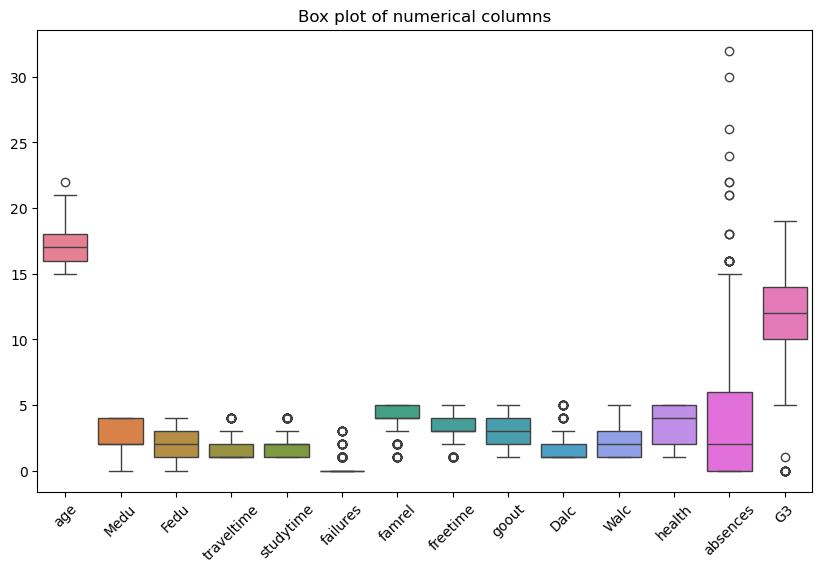

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical columns')
plt.show()

In [27]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())

In [28]:
df[numerical_columns].isnull().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [29]:
df['Mjob'].mode(0)

0    other
Name: Mjob, dtype: object

In [30]:
df[numerical_columns].head()

age  Medu  Fedu  traveltime  studytime  failures    famrel  freetime  \
0   18     4     4           2          2         0  4.000000  3.000000   
1   17     1     1           1          2         0  5.000000  3.000000   
2   15     1     1           1          2         0  3.930341  3.180556   
3   15     4     2           1          3         0  3.000000  2.000000   
4   16     3     3           1          2         0  3.930341  3.000000   

   goout  Dalc  Walc  health  absences  G3  
0      4     1     1       3         4  11  
1      3     1     1       3         2  11  
2      2     2     3       3         6  12  
3      2     1     1       5         0  14  
4      2     1     2       5         0  13

# To determine whether numerical columns follow a normal distribution, you can perform statistical tests or visual inspections. Normal distribution, also known as Guassian distribution, is characterized by a bell-shaped curve where the data cluster around the mean,with most values close to the mean and fewer values farther away.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

In [32]:
#create a figure and axes for subplot

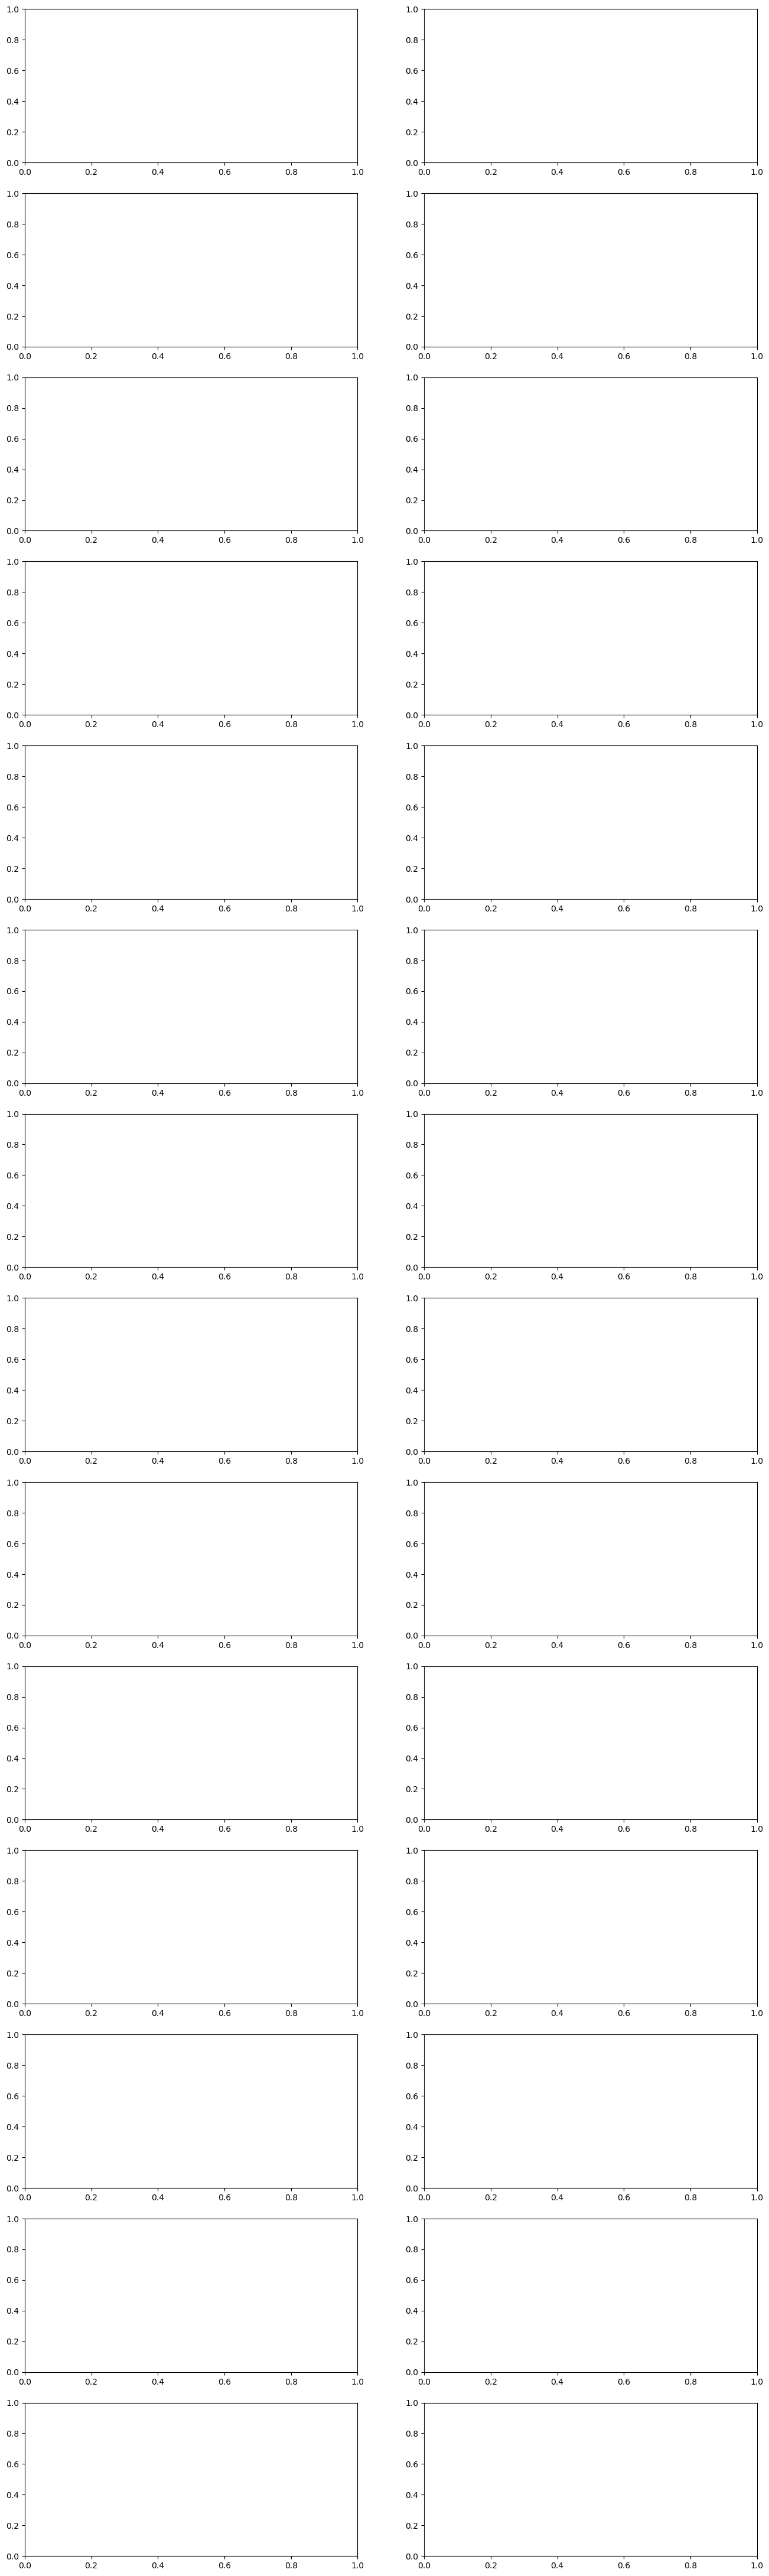

In [53]:
num_cols=len(numerical_columns)
fig,axes=plt.subplots(num_cols, 2, figsize=(16,num_cols*4))

In [34]:
# Plotting histograms and Q-Q plots for each numerical column

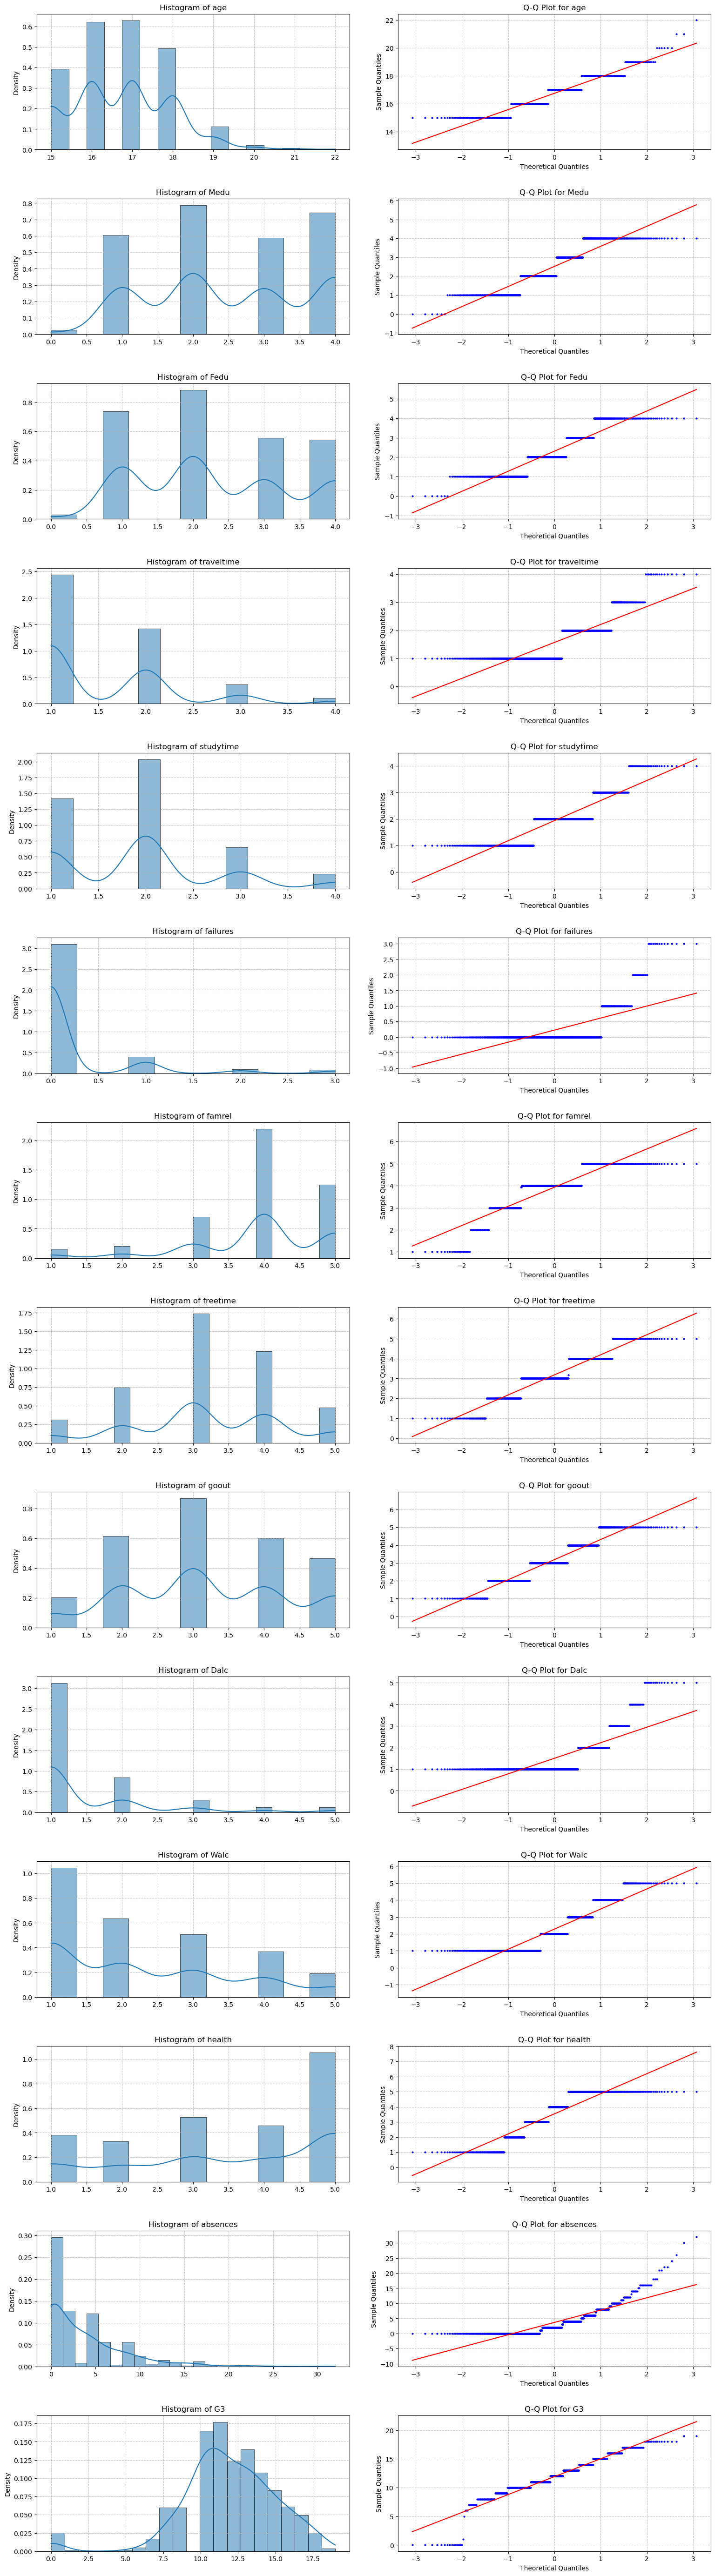

In [55]:

#create a figure and axes for subplot
num_cols=len(numerical_columns)
fig,axes=plt.subplots(num_cols, 2, figsize=(16,num_cols*4))
#Plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], 
                 stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)

#Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0)  # Adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q Plot for {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

#Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors  # Corrected import


# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')


# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)


Column: age
Shapiro-Wilk Test: Statistics=0.916, p-value=0.000
Shapiro-Wilk Test: age does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=20.080
Anderson-Darling Test: Critical Values: [0.573 0.652 0.782 0.912 1.085]
Anderson-Darling Test: age does not look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=18.807, p-value=0.000
Jarque-Bera Test: age does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=17.922, p-value=0.000
D'Agostino and Pearson's Test: age does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=1.000, p-value=0.000
Kolmogorov-Smirnov Test: age does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.175, p-value=0.001
Lilliefors Test: age does not look normally distributed (reject H0)


Column: Medu
Shapiro-Wilk Test: Statistics=0.870, p-value=0.000
Shapiro-Wilk Test: Medu does not look normally distributed (reject H0)
Anderson-Darling Test: 

In [37]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")



Outliers detected using IQR method:
school: True
sex: True
age: True
address: True
famsize: True
Pstatus: True
Medu: False
Fedu: False
Mjob: True
Fjob: True
reason: True
guardian: True
traveltime: True
studytime: True
failures: True
schoolsup: True
famsup: True
paid: True
activities: True
nursery: True
higher: True
internet: True
romantic: True
famrel: True
freetime: True
goout: False
Dalc: True
Walc: False
health: False
absences: True
G3: True


# Function to detect outliers using z-score method and return column-wise boolean indicators

In [38]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")



Outliers detected using Z-score method:
school: True
sex: True
age: True
address: True
famsize: True
Pstatus: True
Medu: False
Fedu: False
Mjob: True
Fjob: True
reason: True
guardian: True
traveltime: True
studytime: False
failures: True
schoolsup: True
famsup: True
paid: True
activities: True
nursery: True
higher: True
internet: True
romantic: True
famrel: True
freetime: False
goout: False
Dalc: True
Walc: False
health: False
absences: True
G3: True


In [39]:

def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      KEC   F   18       U     GT3       A     4     4   at_home   teacher   
1      KEC   F   17       U     GT3       T     1     1   at_home     other   
2      KEC   F   15       U     LE3       T     1     1   at_home     other   
3      KEC   F   15       U     GT3       T     4     2    health  services   
4      KEC   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
641    KEC   F   18       R     GT3       T     2     2   at_home     other   
642    KEC   F   17       U     GT3       T     4     3   teacher     other   
643    KEC   F   18       R     GT3       T     4     4   teacher   at_home   
645    KEC   F   18       U     LE3       T     3     1   teacher  services   
648    KEC   M   18       R     LE3       T     3     2  services     other   


# Function to remove outliers using Z-score method

In [40]:

import numpy as np
import pandas as pd

def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy()
    numerical_columns = data.select_dtypes(include=[np.number]).columns

    for col in numerical_columns:
        mean = np.mean(cleaned_data[col])
        std_dev = np.std(cleaned_data[col])
        z_scores = np.abs((cleaned_data[col] - mean) / std_dev)
        valid_rows = z_scores <= threshold
        cleaned_data = cleaned_data[valid_rows]

    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("\nDataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)



DataFrame after removing outliers using Z-score method:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      KEC   F   18       U     GT3       A     4     4   at_home   teacher   
1      KEC   F   17       U     GT3       T     1     1   at_home     other   
2      KEC   F   15       U     LE3       T     1     1   at_home     other   
3      KEC   F   15       U     GT3       T     4     2    health  services   
4      KEC   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
643    KEC   F   18       R     GT3       T     4     4   teacher   at_home   
644    KEC   F   19       R     GT3       T     2     3  services     other   
645    KEC   F   18       U     LE3       T     3     1   teacher  services   
647    KEC   M   17       U     LE3       T     3     1  services  services   
648    KEC   M   18       R     LE3       T     3     2  services     othe

# Exploitary Data Analysis

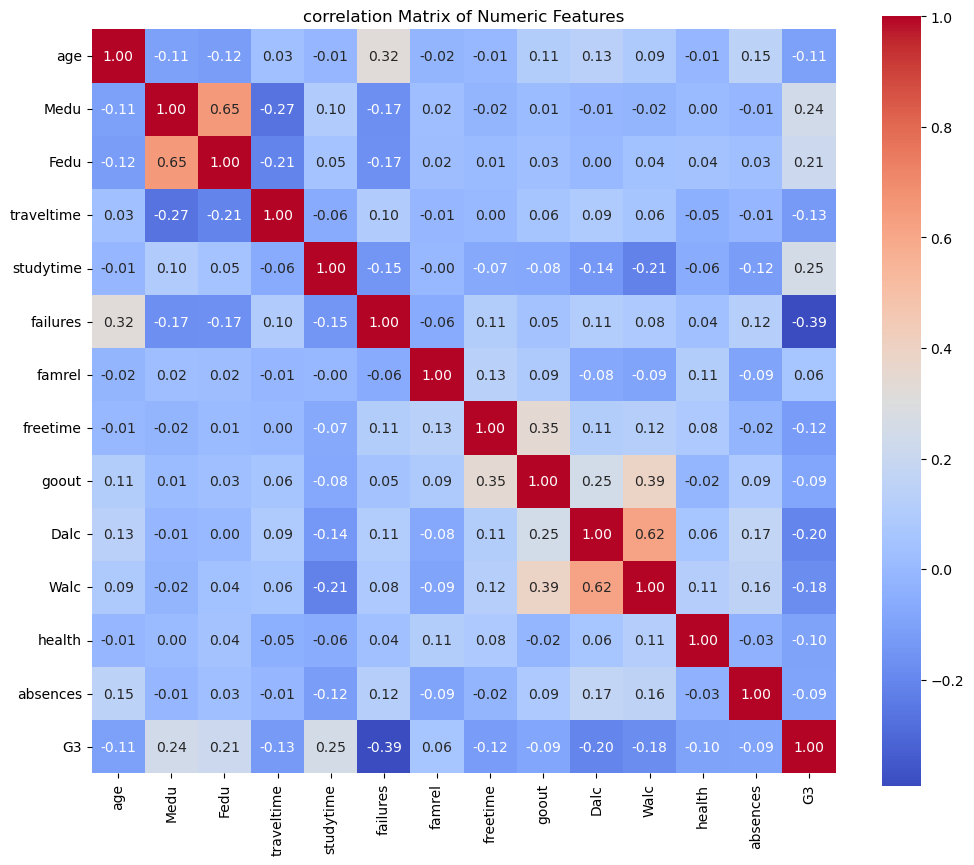

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = df[numerical_columns]
#compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()
#Plotting correlation heatmat
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f",square=True)
plt.title('correlation Matrix of Numeric Features')
plt.show()


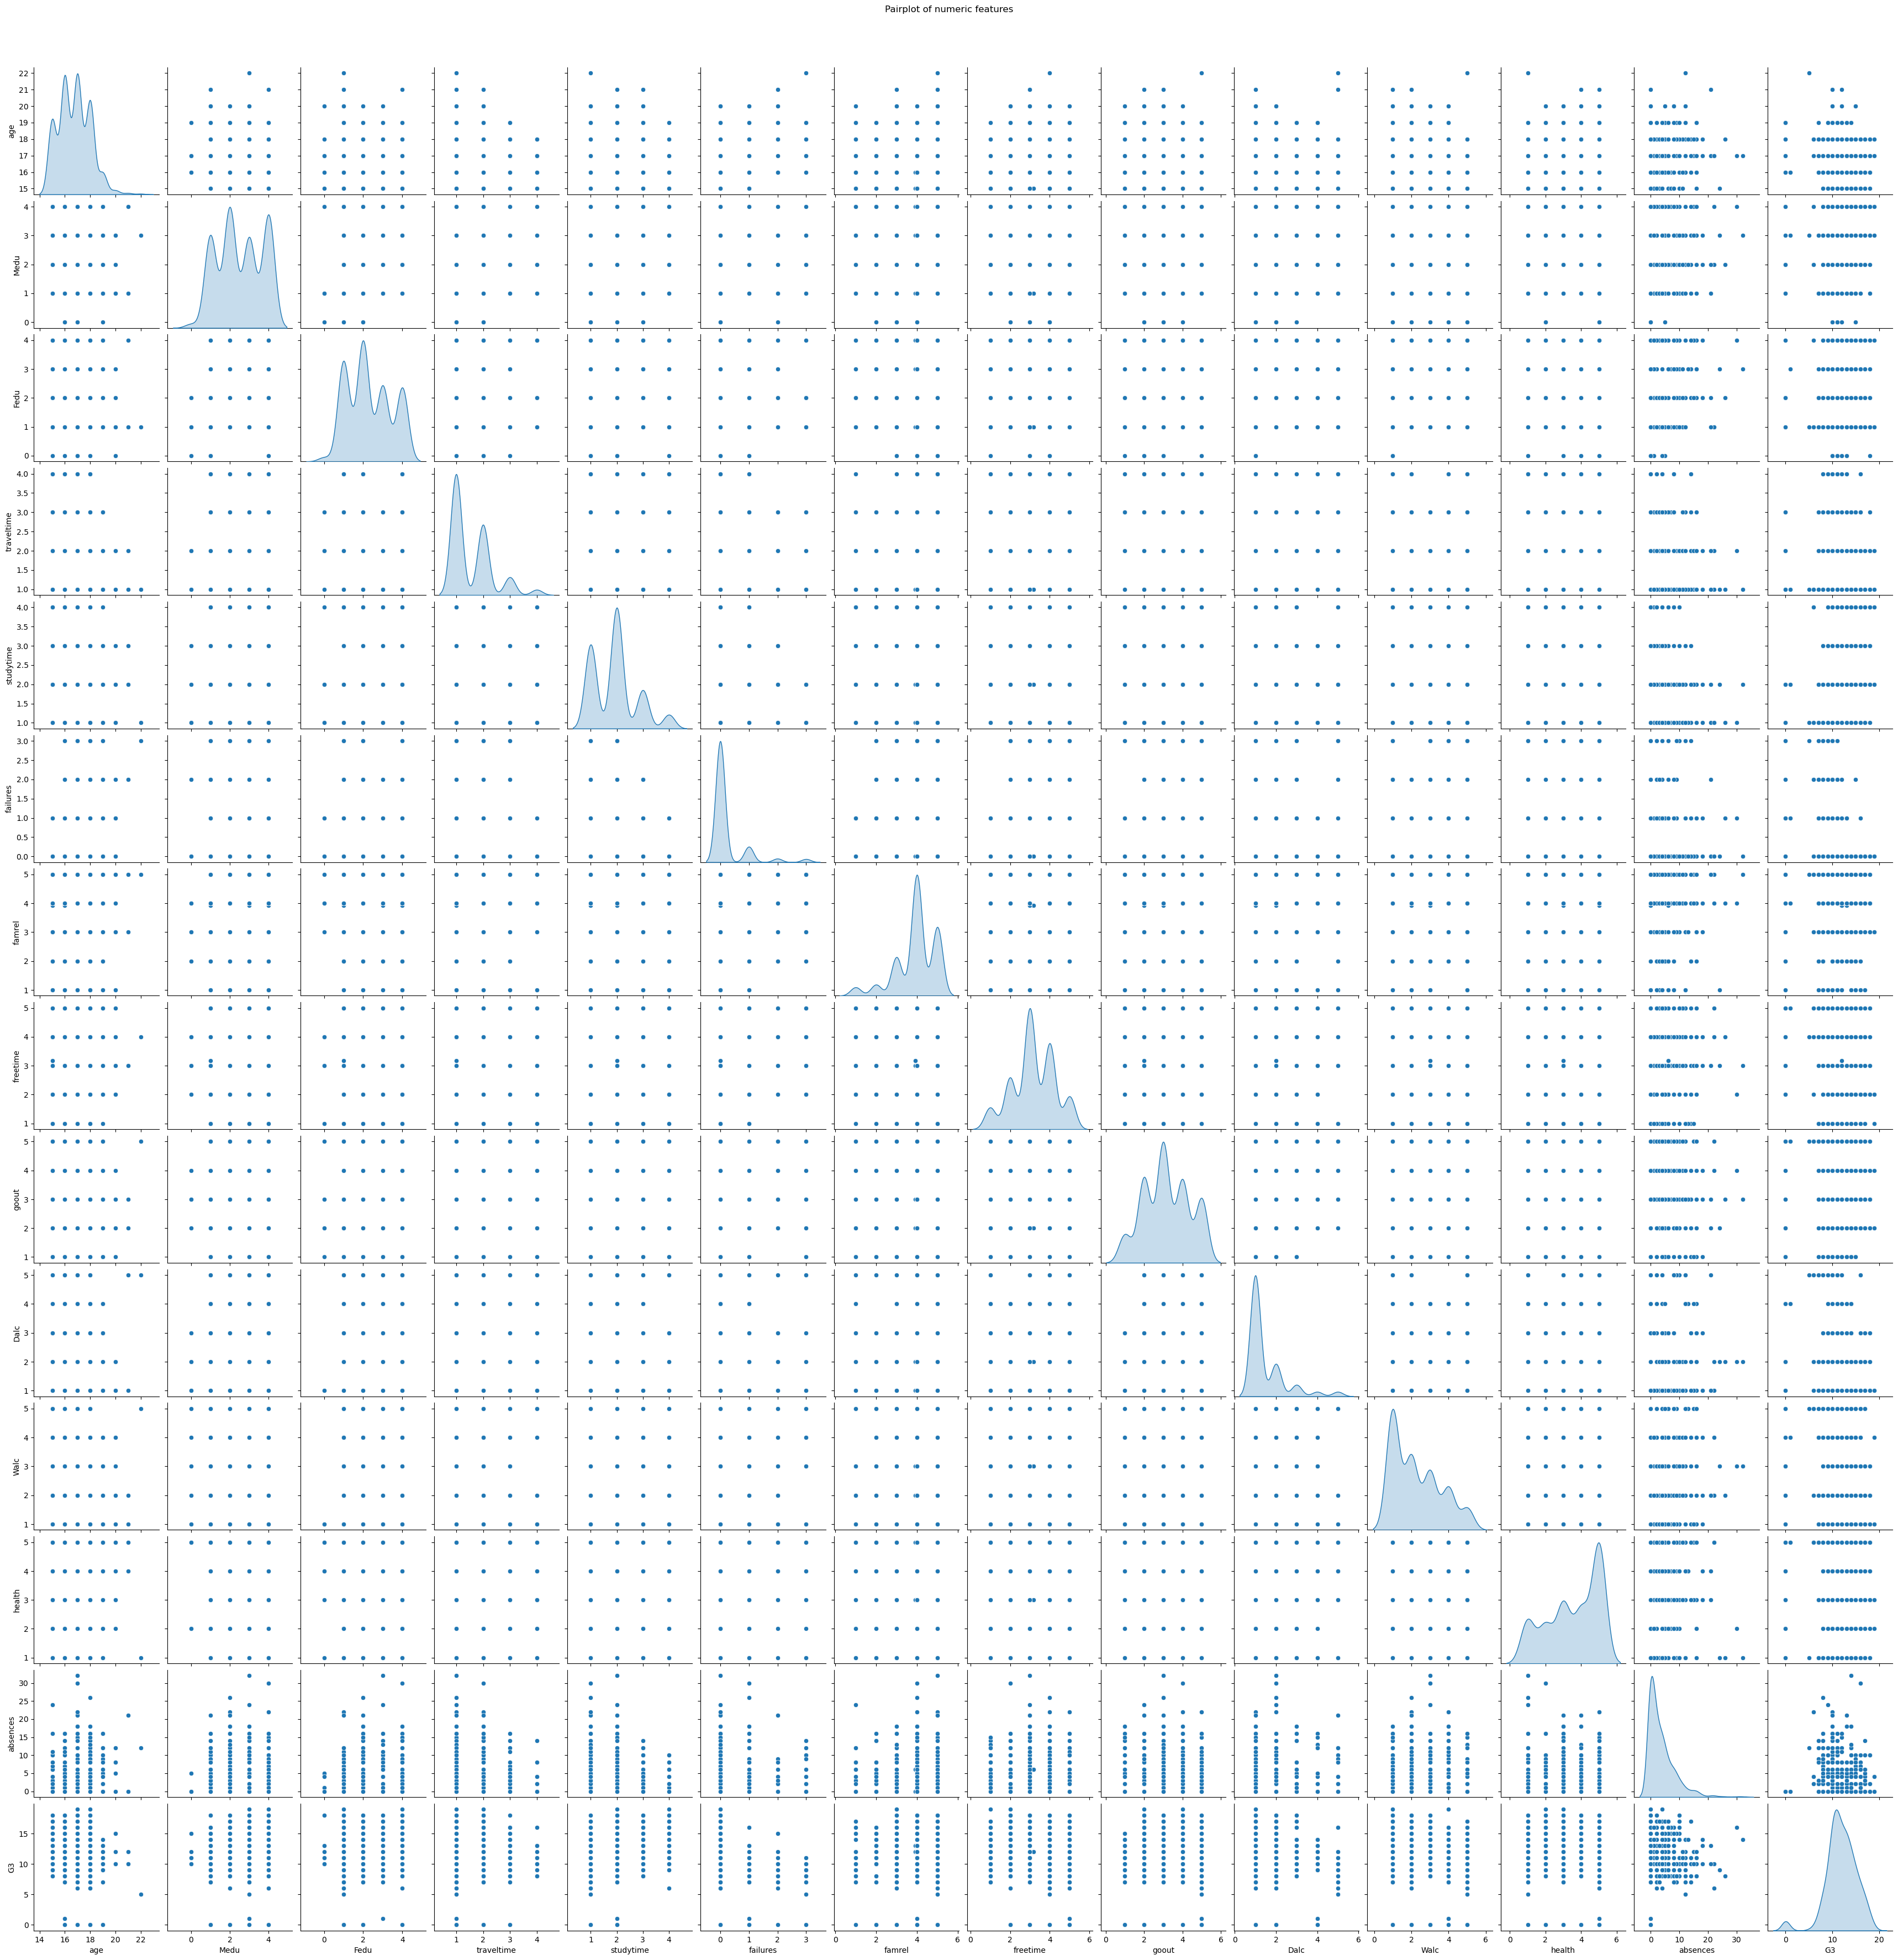

In [42]:
#pairplot of numeric features
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of numeric features', y=1.02)
plt.show()

In [43]:
df.head()


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0    KEC   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1    KEC   F   17       U     GT3       T     1     1  at_home     other  ...   
2    KEC   F   15       U     LE3       T     1     1  at_home     other  ...   
3    KEC   F   15       U     GT3       T     4     2   health  services  ...   
4    KEC   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic    famrel  freetime  goout Dalc Walc health absences  G3  
0       no       no  4.000000  3.000000      4    1    1      3        4  11  
1      yes       no  5.000000  3.000000      3    1    1      3        2  11  
2      yes       no  3.930341  3.180556      2    2    3      3        6  12  
3      yes      yes  3.000000  2.000000      2    1    1      5        0  14  
4       no       no  3.930341  3.000000      2    1    2      5        0  13  

[5 rows x 31 columns]

In [44]:
print(list(df.columns))

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


In [45]:
df['GPA'] = df['G3']/5 #since G3 ranges from 0 to 20
#create new column 'pass/fail'based on GPA condition
df['pass/fail'] =df['G3'].apply(lambda x: 'pass' if x>=12 else 'fail')
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0    KEC   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1    KEC   F   17       U     GT3       T     1     1  at_home     other  ...   
2    KEC   F   15       U     LE3       T     1     1  at_home     other  ...   
3    KEC   F   15       U     GT3       T     4     2   health  services  ...   
4    KEC   F   16       U     GT3       T     3     3    other     other  ...   

     famrel  freetime  goout  Dalc  Walc health absences  G3  GPA pass/fail  
0  4.000000  3.000000      4     1     1      3        4  11  2.2      fail  
1  5.000000  3.000000      3     1     1      3        2  11  2.2      fail  
2  3.930341  3.180556      2     2     3      3        6  12  2.4      pass  
3  3.000000  2.000000      2     1     1      5        0  14  2.8      pass  
4  3.930341  3.000000      2     1     2      5        0  13  2.6      pass  

[5 rows x 33 columns]

In [46]:
df['pass/fail'].value_counts()

pass/fail
pass    348
fail    301
Name: count, dtype: int64

In [47]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0    KEC   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1    KEC   F   17       U     GT3       T     1     1  at_home     other  ...   
2    KEC   F   15       U     LE3       T     1     1  at_home     other  ...   
3    KEC   F   15       U     GT3       T     4     2   health  services  ...   
4    KEC   F   16       U     GT3       T     3     3    other     other  ...   

     famrel  freetime  goout  Dalc  Walc health absences  G3  GPA pass/fail  
0  4.000000  3.000000      4     1     1      3        4  11  2.2      fail  
1  5.000000  3.000000      3     1     1      3        2  11  2.2      fail  
2  3.930341  3.180556      2     2     3      3        6  12  2.4      pass  
3  3.000000  2.000000      2     1     1      5        0  14  2.8      pass  
4  3.930341  3.000000      2     1     2      5        0  13  2.6      pass  

[5 rows x 33 columns]

In [48]:
df.shape

(649, 33)

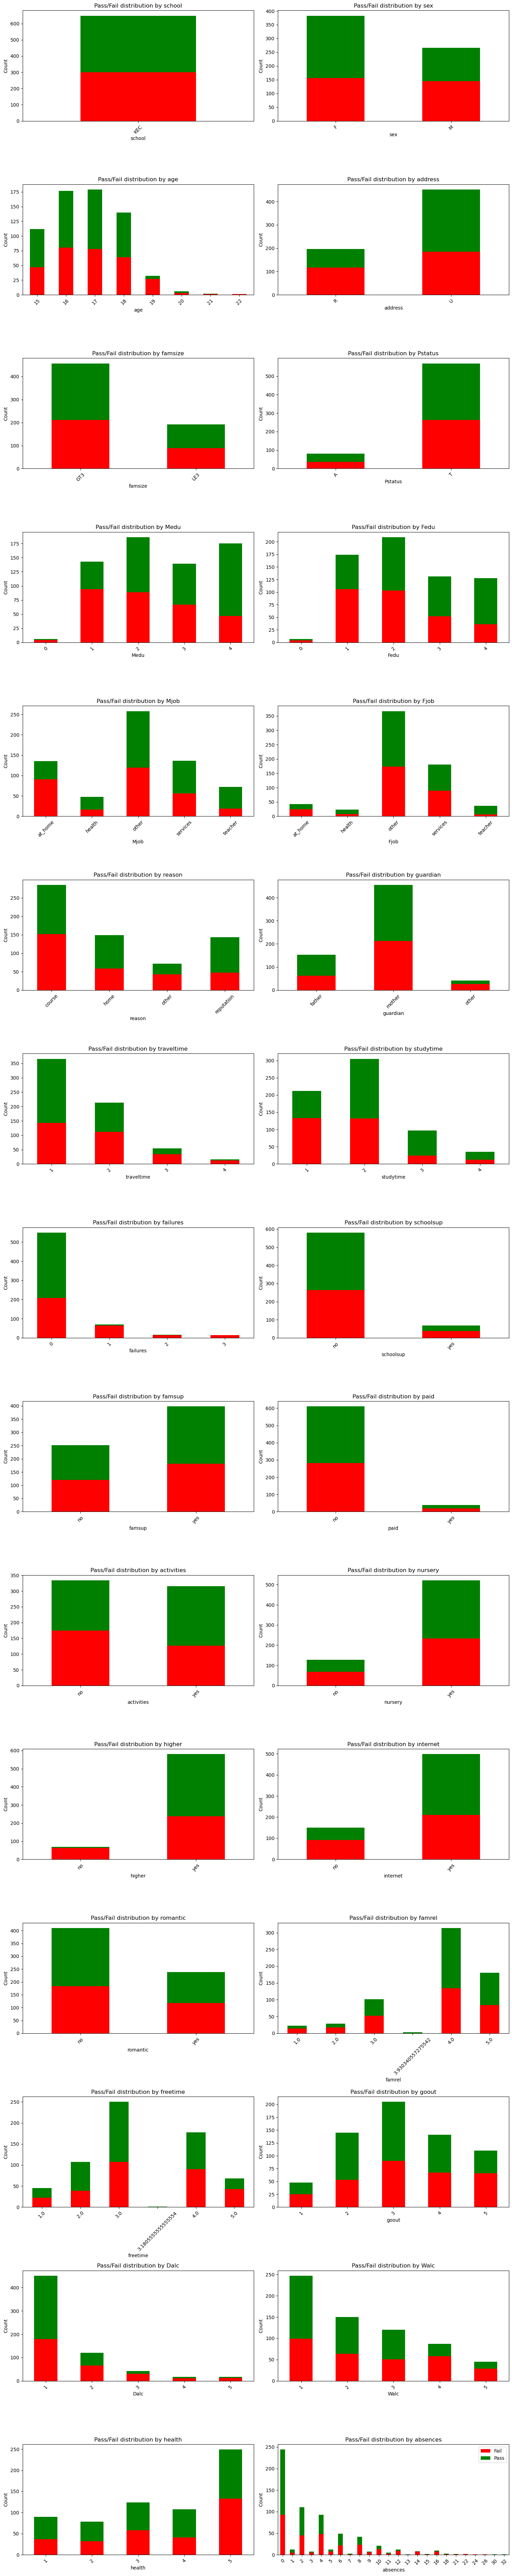

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

#Assuming df, pass/fail column, and GPA column are already defined as per your

#Exclude columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['pass', 'G3','pass/fail','GPA']]
#Calculate number of rows and columns for subplot grid
num_cols=2 #Number of columns in subplot layout
num_rows=(len(columns_to_plot)+1)//num_cols #calculate number of rows 
#Adjust figure size based on number of subplots
fig_width=15
fig_height=num_rows*5 # Adjust height based on number of rows
plt.figure(figsize=(fig_width, fig_height))

#Iterate through each column and plot
for i,col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i+1)
    pass_fail_cross=pd.crosstab(index=df[col], columns=df['pass/fail'])
    pass_fail_cross.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca(), legend=None)
    plt.title(f'Pass/Fail distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0) #Adjust spacing between subplots
 #Adjust layout and display the plot
plt.tight_layout()
plt.legend(['Fail','Pass'], loc='upper right')
plt.show()

In [50]:
#Iterate through each column
for column in df.columns:
    #Get unique values in the column
    unique_values = df[column].unique()
    #print the column name and its unique values
    print(f"Unique values in{column} column:")
    print(unique_values)
    print()#Optional: for separating outputs of different columns#Iterate through each column

Unique values inschool column:
['KEC']

Unique values insex column:
['F' 'M']

Unique values inage column:
[18 17 15 16 19 22 20 21]

Unique values inaddress column:
['U' 'R']

Unique values infamsize column:
['GT3' 'LE3']

Unique values inPstatus column:
['A' 'T']

Unique values inMedu column:
[4 1 3 2 0]

Unique values inFedu column:
[4 1 2 3 0]

Unique values inMjob column:
['at_home' 'health' 'other' 'services' 'teacher']

Unique values inFjob column:
['teacher' 'other' 'services' 'health' 'at_home']

Unique values inreason column:
['course' 'other' 'home' 'reputation']

Unique values inguardian column:
['mother' 'father' 'other']

Unique values intraveltime column:
[2 1 3 4]

Unique values instudytime column:
[2 3 1 4]

Unique values infailures column:
[0 3 1 2]

Unique values inschoolsup column:
['yes' 'no']

Unique values infamsup column:
['no' 'yes']

Unique values inpaid column:
['no' 'yes']

Unique values inactivities column:
['no' 'yes']

Unique values innursery column:
['ye

In [51]:
df.to_csv('Data_Sets/filtered_data.csv',index=False)

In [100]:
data=pd.read_csv('Data_Sets/Filtered_data.csv')

In [101]:
data.head(60)
data['Mjob'].value_counts()

Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

In [102]:
counts=data['pass/fail'].value_counts()
counts

pass/fail
pass    348
fail    301
Name: count, dtype: int64

In [103]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3', 'GPA', 'pass/fail'],
      dtype='object')

In [65]:
# Display the first few rows and columns
pd.set_option('display.max_columns',None)# This with display all columns
print("First few rows of data:")
print(df.head())

First few rows of data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0    KEC   F   18       U     GT3       A     4     4  at_home   teacher   
1    KEC   F   17       U     GT3       T     1     1  at_home     other   
2    KEC   F   15       U     LE3       T     1     1  at_home     other   
3    KEC   F   15       U     GT3       T     4     2   health  services   
4    KEC   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic    famrel 

In [104]:
data.drop(columns=['school'],axis=1,inplace=True)

In [105]:
data.head()

sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0   F   18       U     GT3       A     4     4  at_home   teacher  course   
1   F   17       U     GT3       T     1     1  at_home     other  course   
2   F   15       U     LE3       T     1     1  at_home     other   other   
3   F   15       U     GT3       T     4     2   health  services    home   
4   F   16       U     GT3       T     3     3    other     other    home   

  guardian  traveltime  studytime  failures schoolsup famsup paid activities  \
0   mother           2          2         0       yes     no   no         no   
1   father           1          2         0        no    yes   no         no   
2   mother           1          2         0       yes     no   no         no   
3   mother           1          3         0        no    yes   no        yes   
4   father           1          2         0        no    yes   no         no   

  nursery higher internet romantic    famrel  freetime  goout  Dalc  Walc  \
0     yes    yes       no       no  4.000000  3.000000      4     1     1   
1      no    yes      yes       no  5.000000  3.000000      3     1     1   
2     yes    yes      yes       no  3.930341  3.180556      2     2     3   
3     yes    yes      yes      yes  3.000000  2.000000      2     1     1   
4     yes    yes       no       no  3.930341  3.000000      2     1     2   

   health  absences  G3  GPA pass/fail  
0       3         4  11  2.2      fail  
1       3         2  11  2.2      fail  
2       3         6  12  2.4      pass  
3       5         0  14  2.8      pass  
4       5         0  13  2.6      pass

In [106]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns

In [107]:
for col in category_cols:
    unique_values=data[col].unique()
    print(f"unique values in '{col}'column:")
    for value in unique_values:
        print(value)
        print()
    

unique values in 'sex'column:
F

M

unique values in 'address'column:
U

R

unique values in 'famsize'column:
GT3

LE3

unique values in 'Pstatus'column:
A

T

unique values in 'Mjob'column:
at_home

health

other

services

teacher

unique values in 'Fjob'column:
teacher

other

services

health

at_home

unique values in 'reason'column:
course

other

home

reputation

unique values in 'guardian'column:
mother

father

other

unique values in 'schoolsup'column:
yes

no

unique values in 'famsup'column:
no

yes

unique values in 'paid'column:
no

yes

unique values in 'activities'column:
no

yes

unique values in 'nursery'column:
yes

no

unique values in 'higher'column:
yes

no

unique values in 'internet'column:
no

yes

unique values in 'romantic'column:
no

yes

unique values in 'pass/fail'column:
fail

pass



In [108]:
data.head()

sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0   F   18       U     GT3       A     4     4  at_home   teacher  course   
1   F   17       U     GT3       T     1     1  at_home     other  course   
2   F   15       U     LE3       T     1     1  at_home     other   other   
3   F   15       U     GT3       T     4     2   health  services    home   
4   F   16       U     GT3       T     3     3    other     other    home   

  guardian  traveltime  studytime  failures schoolsup famsup paid activities  \
0   mother           2          2         0       yes     no   no         no   
1   father           1          2         0        no    yes   no         no   
2   mother           1          2         0       yes     no   no         no   
3   mother           1          3         0        no    yes   no        yes   
4   father           1          2         0        no    yes   no         no   

  nursery higher internet romantic    famrel  freetime  goout  Dalc  Walc  \
0     yes    yes       no       no  4.000000  3.000000      4     1     1   
1      no    yes      yes       no  5.000000  3.000000      3     1     1   
2     yes    yes      yes       no  3.930341  3.180556      2     2     3   
3     yes    yes      yes      yes  3.000000  2.000000      2     1     1   
4     yes    yes       no       no  3.930341  3.000000      2     1     2   

   health  absences  G3  GPA pass/fail  
0       3         4  11  2.2      fail  
1       3         2  11  2.2      fail  
2       3         6  12  2.4      pass  
3       5         0  14  2.8      pass  
4       5         0  13  2.6      pass

In [122]:
#Drop numerical columns from data
data_categorical = data.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns
encoded_data =pd.get_dummies(data_categorical,columns=['sex','address','guardian','famsize','Pstatus','Mjob','Fjob','reason','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
encoded_data.head()

pass/fail  sex_F  sex_M  address_R  address_U  guardian_father  \
0      fail   True  False      False       True            False   
1      fail   True  False      False       True             True   
2      pass   True  False      False       True            False   
3      pass   True  False      False       True            False   
4      pass   True  False      False       True             True   

   guardian_mother  guardian_other  famsize_GT3  famsize_LE3  Pstatus_A  \
0             True           False         True        False       True   
1            False           False         True        False      False   
2             True           False        False         True      False   
3             True           False         True        False      False   
4            False           False         True        False      False   

   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0      False          True        False       False          False   
1       True          True        False       False          False   
2       True          True        False       False          False   
3       True         False         True       False          False   
4       True         False        False        True          False   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
0         False         False        False       False          False   
1         False         False        False        True          False   
2         False         False        False        True          False   
3         False         False        False       False           True   
4         False         False        False        True          False   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0          True           True        False         False              False   
1         False           True        False         False              False   
2         False          False        False          True              False   
3         False          False         True         False              False   
4         False          False         True         False              False   

   schoolsup_no  schoolsup_yes  famsup_no  famsup_yes  paid_no  paid_yes  \
0         False           True       True       False     True     False   
1          True          False      False        True     True     False   
2         False           True       True       False     True     False   
3          True          False      False        True     True     False   
4          True          False      False        True     True     False   

   activities_no  activities_yes  nursery_no  nursery_yes  higher_no  \
0           True           False       False         True      False   
1           True           False        True        False      False   
2           True           False       False         True      False   
3          False            True       False         True      False   
4           True           False       False         True      False   

   higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0        True         True         False         True         False  
1        True        False          True         True         False  
2        True        False          True         True         False  
3        True        False          True        False          True  
4        True         True         False         True         False

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming encoded_data is already created from one-hot encoding
# numerical_cols should be defined earlier as numerical columns from your datasets

# Pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Transform numerical columns
numerical_data = numerical_pipeline.fit_transform(data[numerical_cols])
# Convert transformed numerical data back to DataFrame
numerical_data_data = pd.DataFrame(numerical_data, columns=numerical_cols)
# Combine numerical and categorical data
final_data = pd.concat([encoded_data, numerical_data_data], axis=1)
# Now final_data contains all your processed data ready for modeling


In [124]:
final_data.head(30)

pass/fail  sex_F  sex_M  address_R  address_U  guardian_father  \
0       fail   True  False      False       True            False   
1       fail   True  False      False       True             True   
2       pass   True  False      False       True            False   
3       pass   True  False      False       True            False   
4       pass   True  False      False       True             True   
5       pass  False   True      False       True            False   
6       pass  False   True      False       True            False   
7       pass   True  False      False       True            False   
8       pass  False   True      False       True            False   
9       pass  False   True      False       True            False   
10      pass   True  False      False       True            False   
11      pass   True  False      False       True             True   
12      pass  False   True      False       True             True   
13      pass  False   True      False       True            False   
14      pass  False   True      False       True            False   
15      pass   True  False      False       True            False   
16      pass   True  False      False       True            False   
17      pass   True  False      False       True            False   
18      fail  False   True      False       True            False   
19      pass  False   True      False       True             True   
20      pass  False   True      False       True            False   
21      pass  False   True      False       True             True   
22      pass  False   True      False       True            False   
23      fail  False   True      False       True            False   
24      fail   True  False       True      False            False   
25      pass   True  False      False       True            False   
26      pass  False   True      False       True            False   
27      fail  False   True      False       True            False   
28      pass  False   True      False       True            False   
29      pass  False   True      False       True            False   

    guardian_mother  guardian_other  famsize_GT3  famsize_LE3  Pstatus_A  \
0              True           False         True        False       True   
1             False           False         True        False      False   
2              True           False        False         True      False   
3              True           False         True        False      False   
4             False           False         True        False      False   
5              True           False        False         True      False   
6              True           False        False         True      False   
7              True           False         True        False       True   
8              True           False        False         True       True   
9              True           False         True        False      False   
10             True           False         True        False      False   
11            False           False         True        False      False   
12            False           False        False         True      False   
13             True           False         True        False      False   
14            False            True         True        False       True   
15             True           False         True        False      False   
16             True           False         True        False      False   
17             True           False         True        False      False   
18             True           False         True        False      False   
19            False           False        False         True      False   
20             True           False         True        False      False   
21            False           False         True        False      False   
22             True           False        False         True      False   
23             True           False    

# Machine Learning Model Implementation

# Logistic Regression

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving the model and loading



In [126]:
#Extract features(X) and target variable(Y)
X = final_data.drop('pass/fail',axis=1)
y = final_data['pass/fail']
# Convert target variable to numerical (0 and 1)
y=y.map({'fail':0,'pass':1})
# split data into training and testing sets
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
# Initialize logistic regression model
model =LogisticRegression()

In [128]:
# Fit the model
model.fit(X_train,y_train)

LogisticRegression()

Training Accuracy: 1.00
Testing Accuracy: 0.99
Confusion Matrix:
[[57  0]
 [ 1 72]]


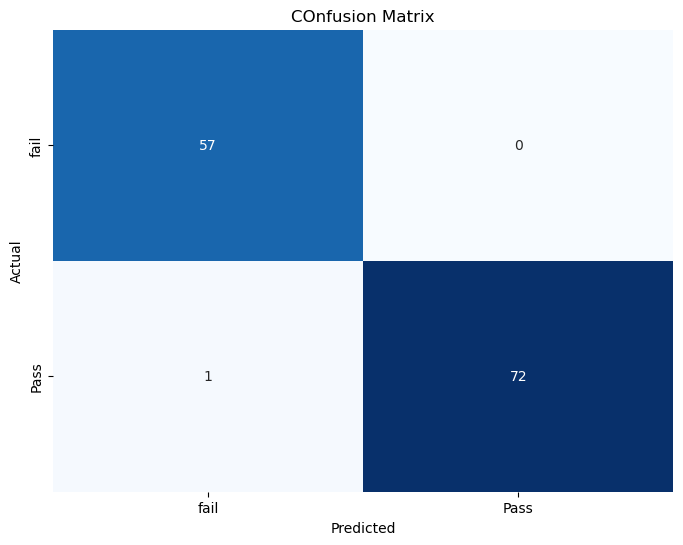

In [132]:
#Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
  
#generate confusion matrix for test set

cm= confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)
#plot confusion matrix
plt.figure(figsize=(8,6))
  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['fail','Pass'], yticklabels=['fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('COnfusion Matrix')
plt.show()

  
  
  
  


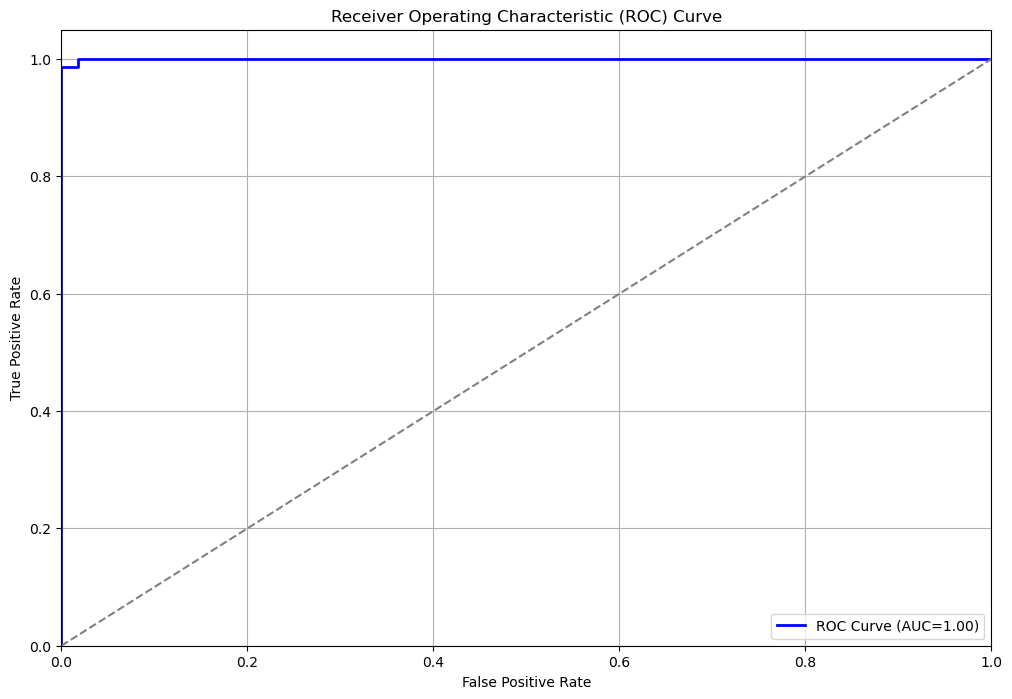

In [136]:

#Calculate Roc curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:,1] #Probability of positive class
fpr,tpr, roc_thresholds = roc_curve(y_test ,y_prob)
auc = roc_auc_score(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC={auc:.2f})')
plt.plot([0,1],[0,1],color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


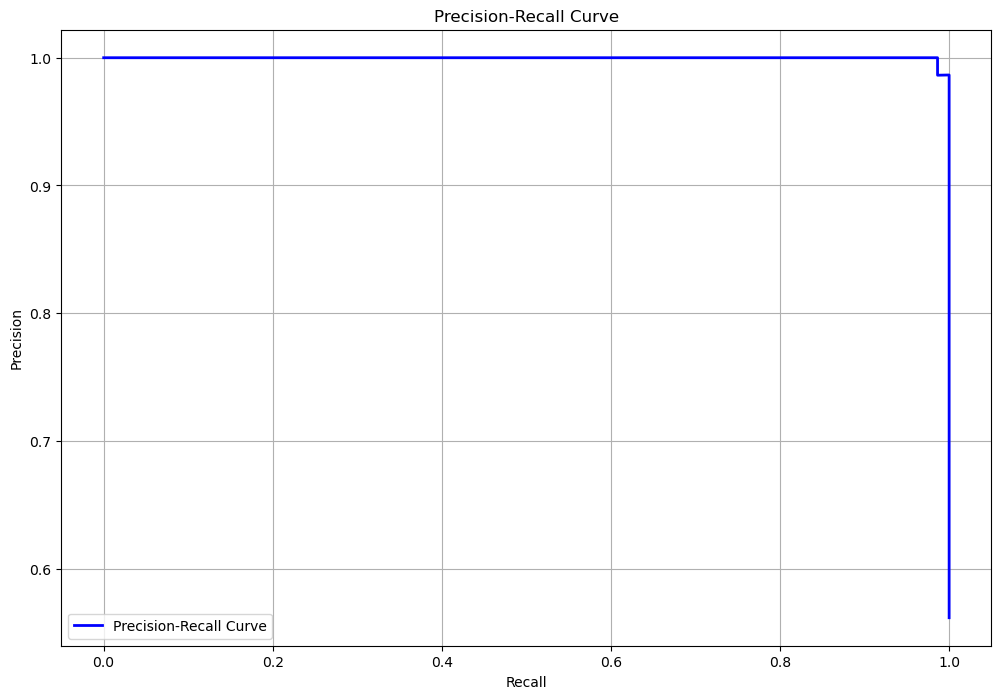

In [140]:
#Calculate Precision_Recall curve and F1 Score curve for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test,y_prob)
f1_scores = 2* (precision * recall) / (precision + recall)
# Plot Precision-Recall curve
plt.figure(figsize=(12,8))
plt.plot(recall,precision,color='blue',lw=2,label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

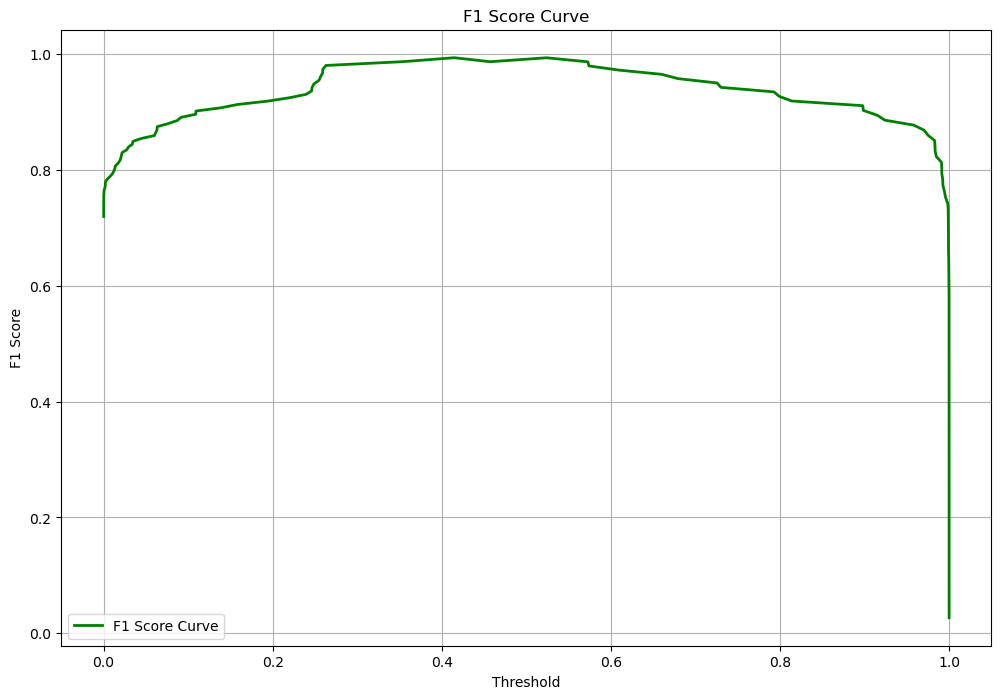

In [149]:
# Plot F1 Score curve
plt.figure(figsize=(12, 8))
plt.plot(pr_thresholds, f1_scores[:-1], color='green', lw=2, label='F1 Score Curve')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.grid (True)
plt.show()

In [152]:
#Save  the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')
model_path='ML_MODEL/Logistic_regression_mode.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/Logistic_regression_mode.pkl


# Decision Tree

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [155]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


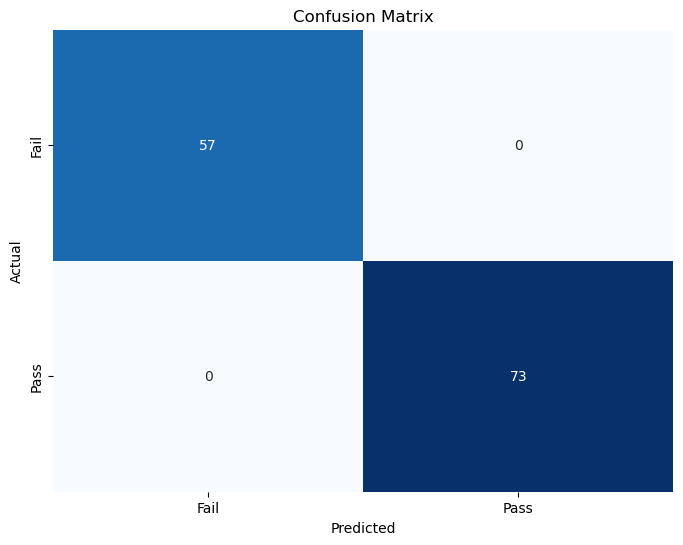

In [156]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

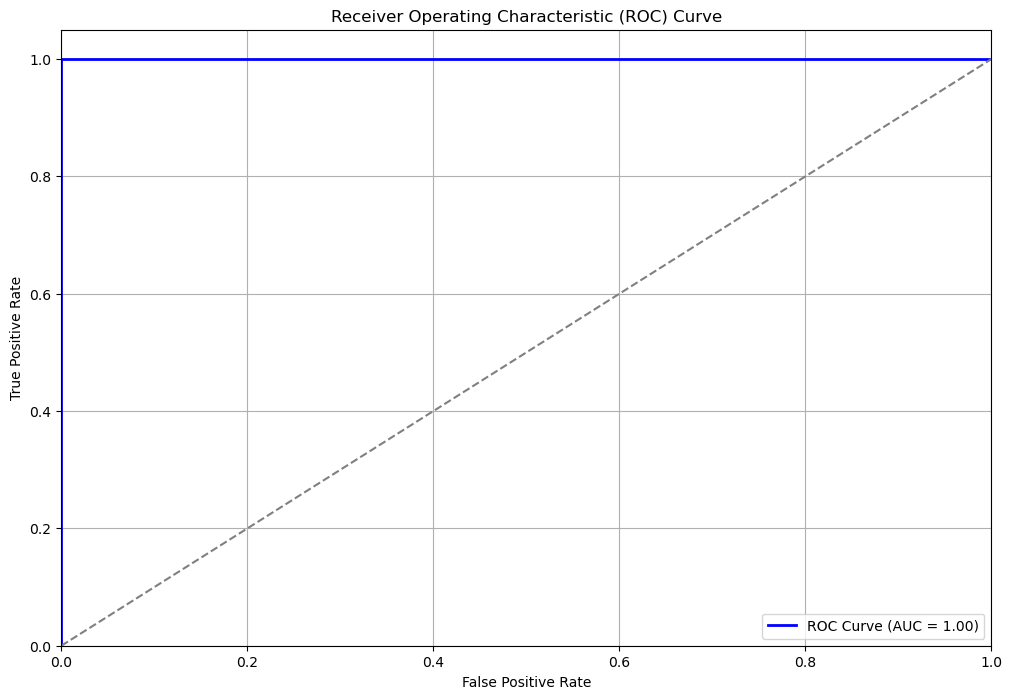

In [157]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



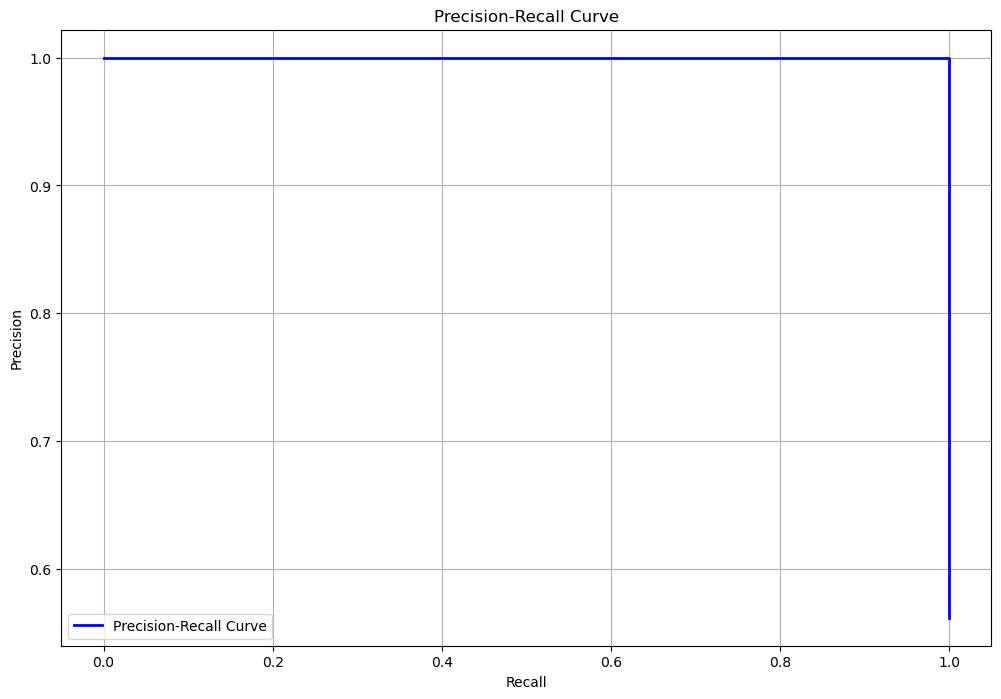

In [158]:
# Calculate Precision-Recall curve and F1 Score curve for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot Precision-Recall curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()




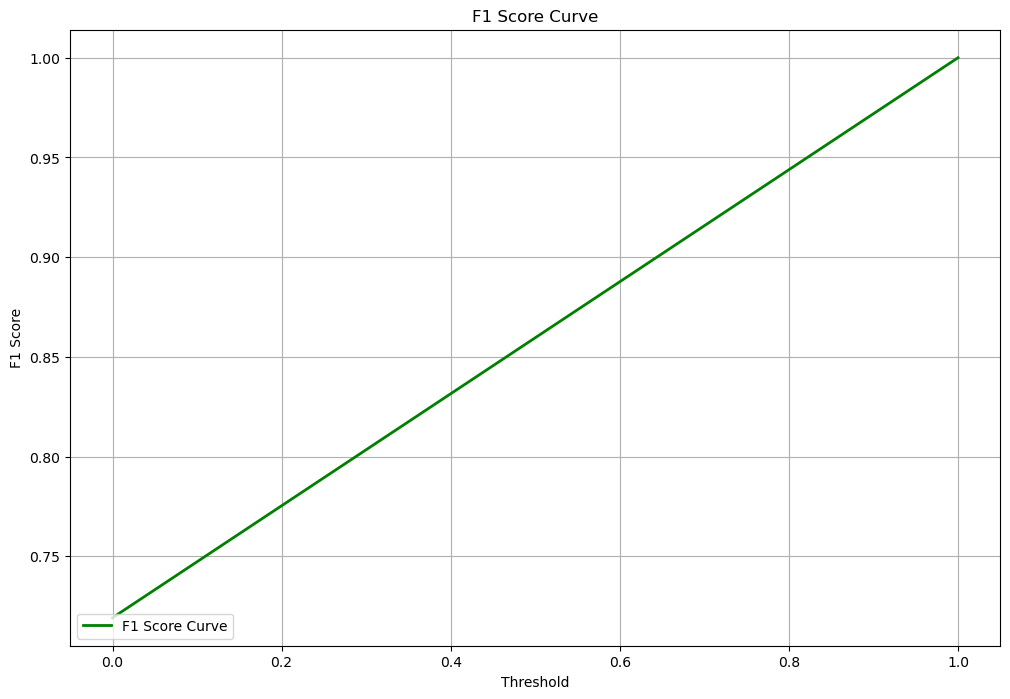

In [159]:

# Plot F1 Score curve
plt.figure(figsize=(12, 8))
plt.plot(pr_thresholds, f1_scores[:-1], color='green', lw=2, label='F1 Score Curve')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()





In [160]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/decision_tree_model.pkl


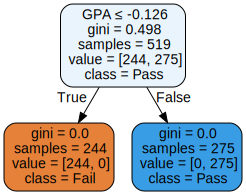

In [164]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

# Export the tree to a dot file
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,
                           class_names=['Fail', 'Pass'],
                           filled=True, rounded=True, special_characters=True)

# Create a graph from dot file
graph = graphviz.Source(dot_data)
# Display the tree
display(graph)

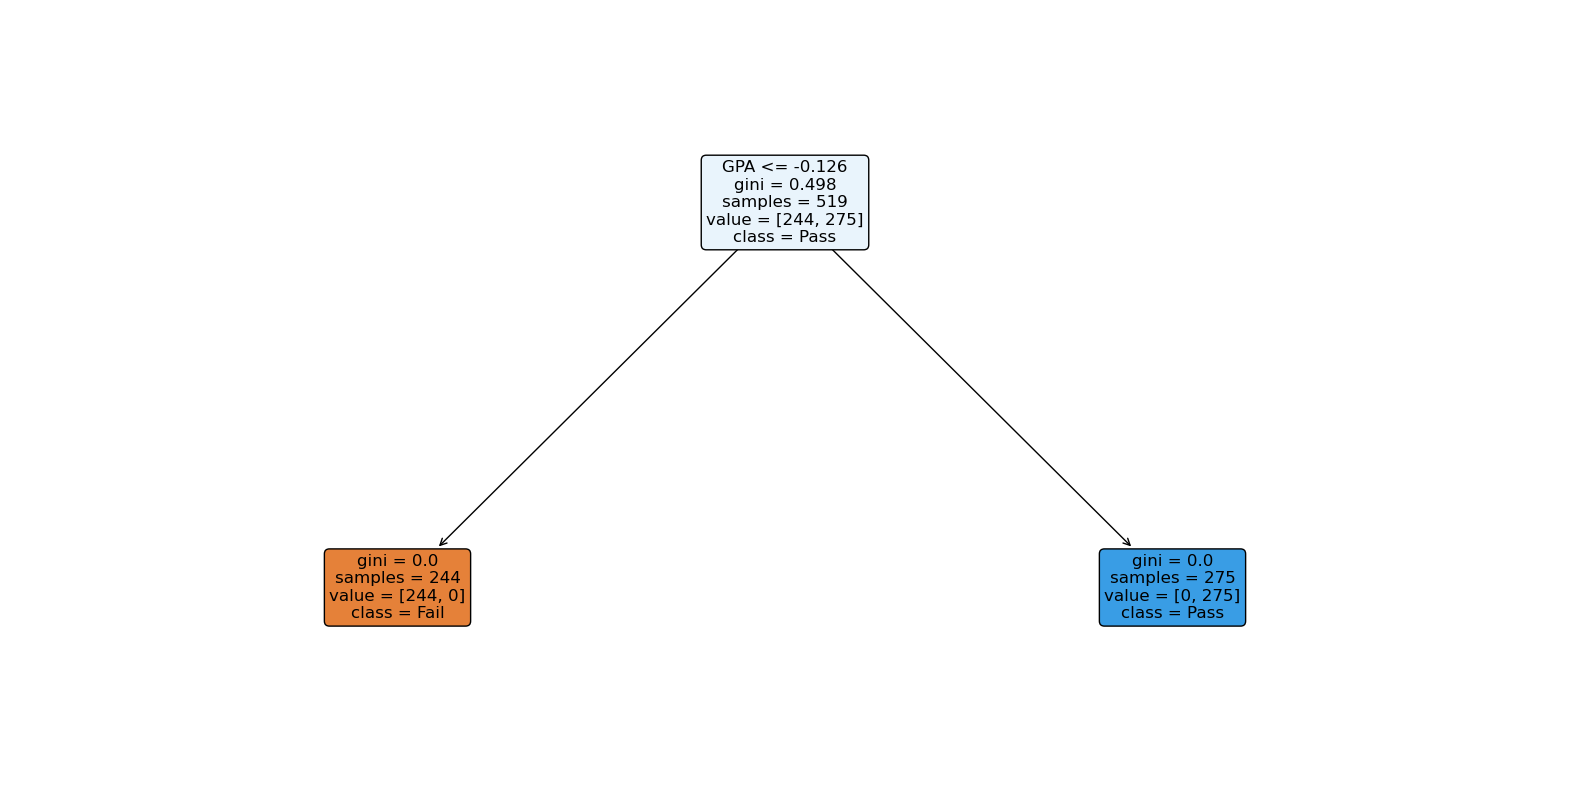

In [165]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               feature_names=X.columns,
               class_names=['Fail', 'Pass'],
               filled=True, 
               rounded=True, 
               fontsize=12)
plt.show()


# Gaussian Naive

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model




In [167]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

GaussianNB()

Training Accuracy: 0.87
Testing Accuracy: 0.82
Confusion Matrix:
[[38 19]
 [ 5 68]]


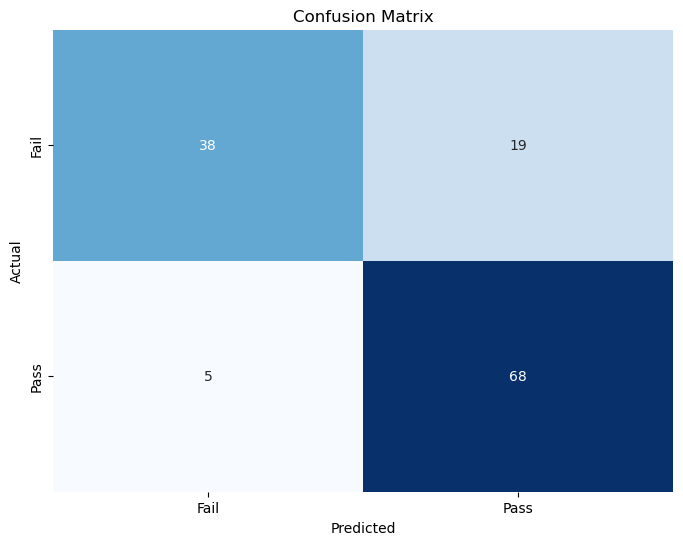

In [168]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



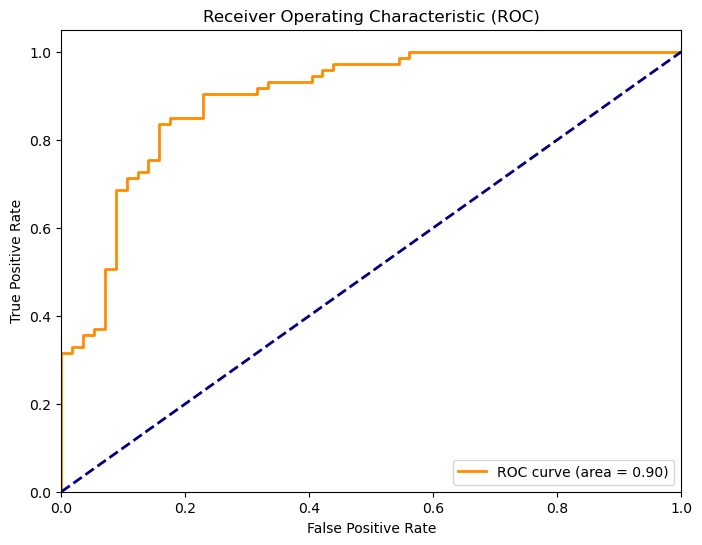

In [169]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

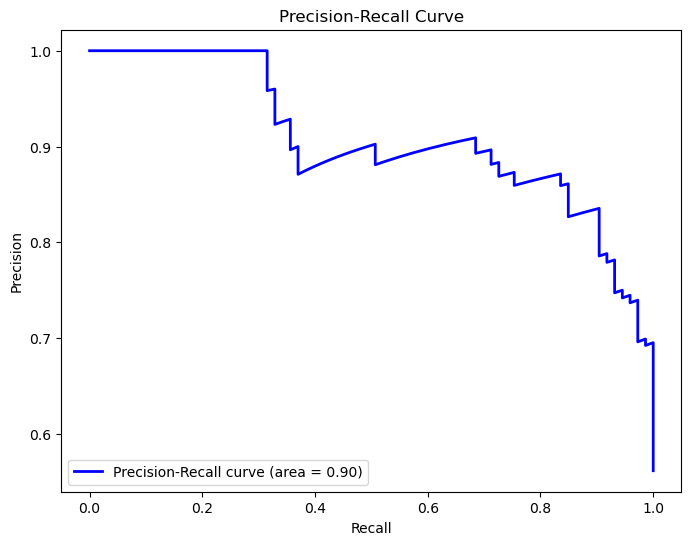

In [170]:

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
average_precision = roc_auc_score(y_test, y_test_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()




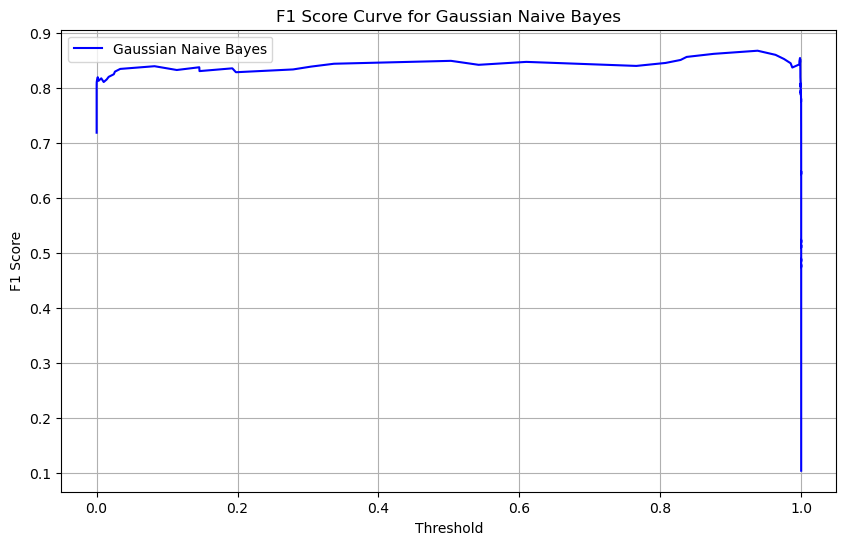

In [171]:
# Get probability estimates for the test set
y_scores_gnb = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision, recall, and thresholds
precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y_test, y_scores_gnb)

# Calculate F1 scores for each threshold
f1_scores_gnb = 2 * (precision_gnb * recall_gnb) / (precision_gnb + recall_gnb + 1e-10)

# Plot F1 Score Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds_gnb, f1_scores_gnb[:-1], label='Gaussian Naive Bayes', color='blue')

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve for Gaussian Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

In [172]:

# Save the model to a file
model_filename = 'ML_MODEL/gaussian_naive_bayes_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')


Model saved as ML_MODEL/gaussian_naive_bayes_model.pkl


# Grading Boosting

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model



In [174]:

# Initialize Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


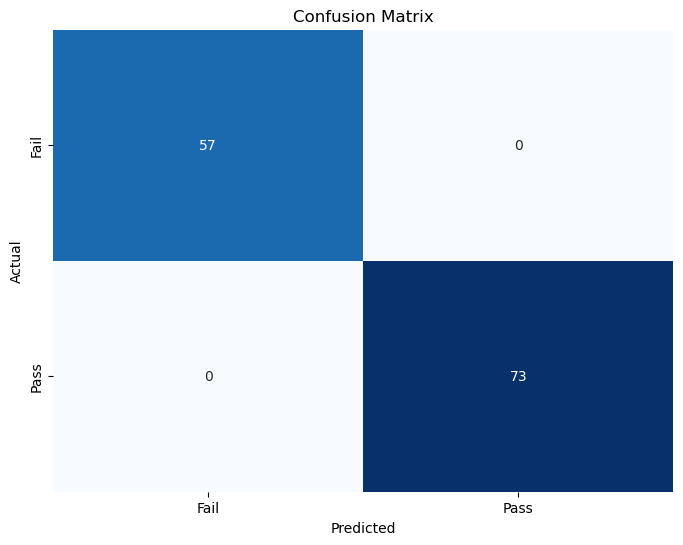

In [175]:

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

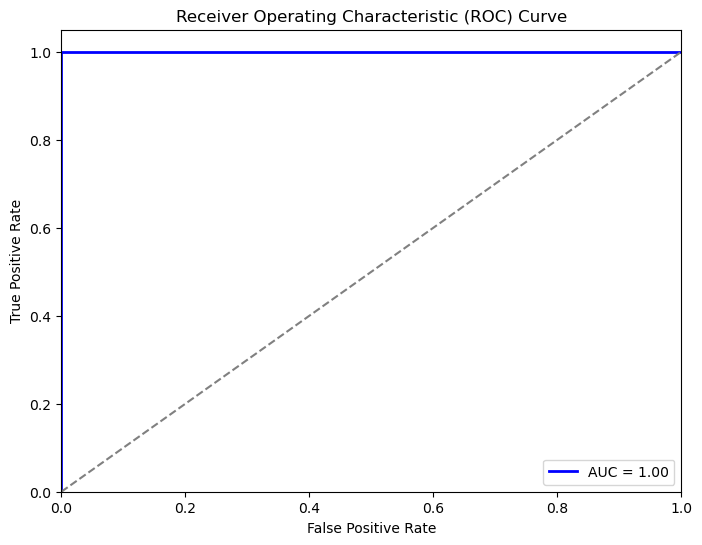

In [176]:


# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


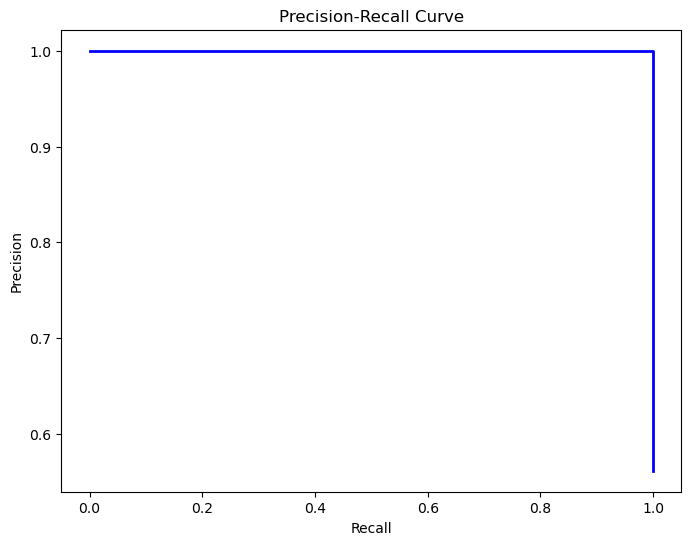

In [177]:

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


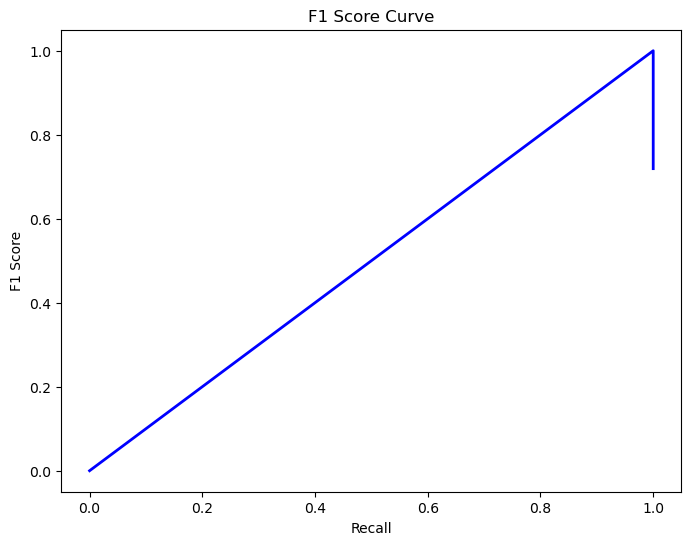

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision, recall, and F1 scores
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Plot F1 Score Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()



In [179]:
import joblib
import os

# Define model save path
model_path = 'ML_MODEL/gradient_boosting_model.pkl'

# Create directory if it does not exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to ML_MODEL/gradient_boosting_model.pkl


# knn

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [181]:

# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)


KNeighborsClassifier()

Training Accuracy: 0.90
Testing Accuracy: 0.78
Confusion Matrix:
[[36 21]
 [ 7 66]]


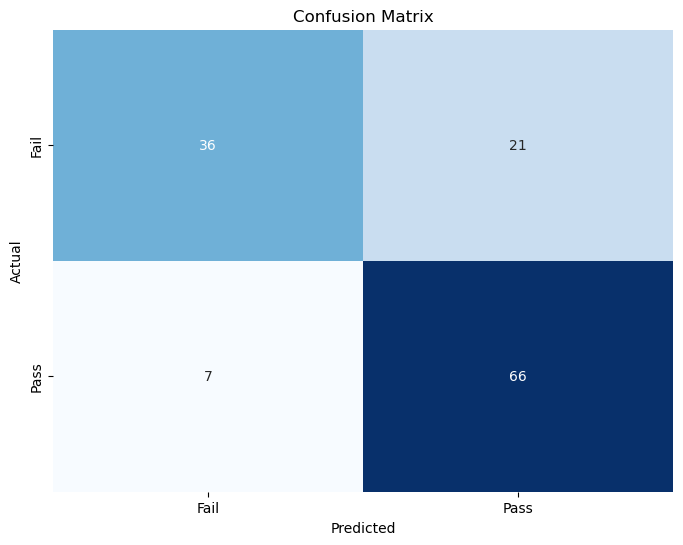

In [182]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

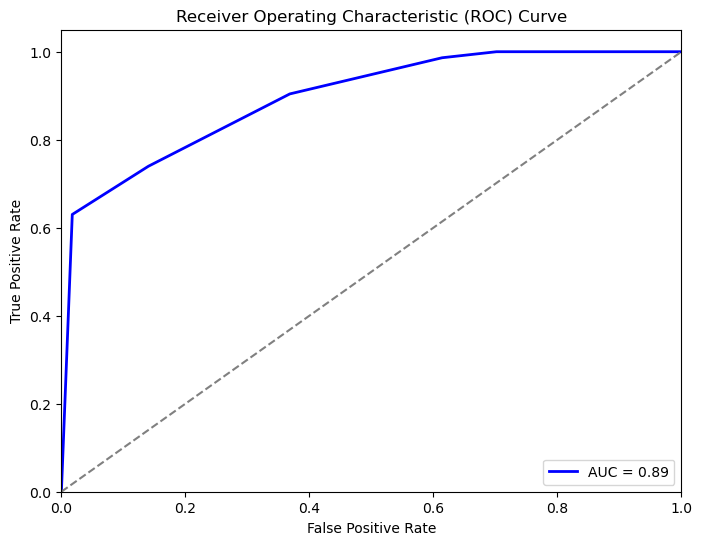

In [183]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

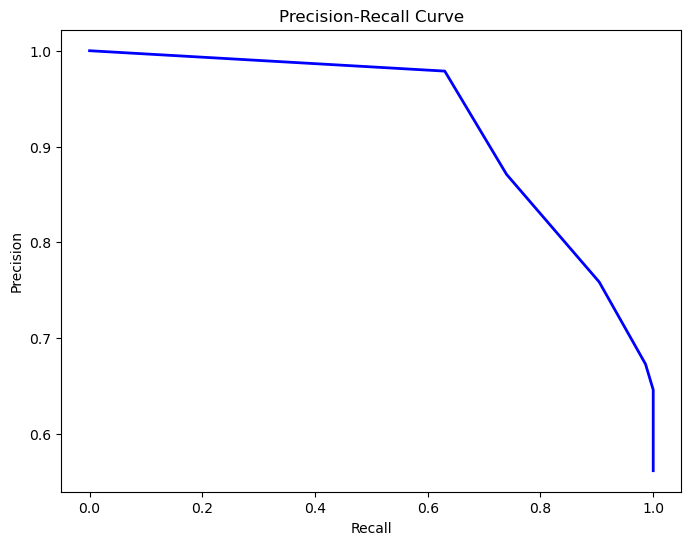

In [184]:

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

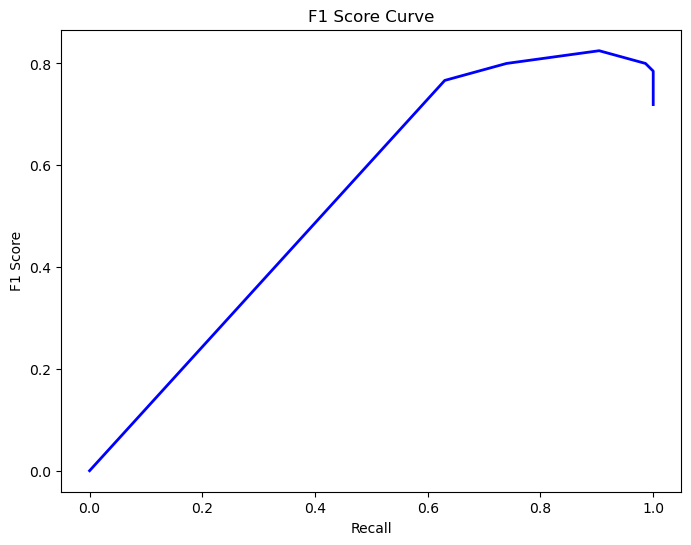

In [185]:
# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()


In [186]:

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/knn_model.pkl


# Mlp classifier

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [188]:
# Initialize MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Fit the model
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 0.97
Confusion Matrix:
[[56  1]
 [ 3 70]]


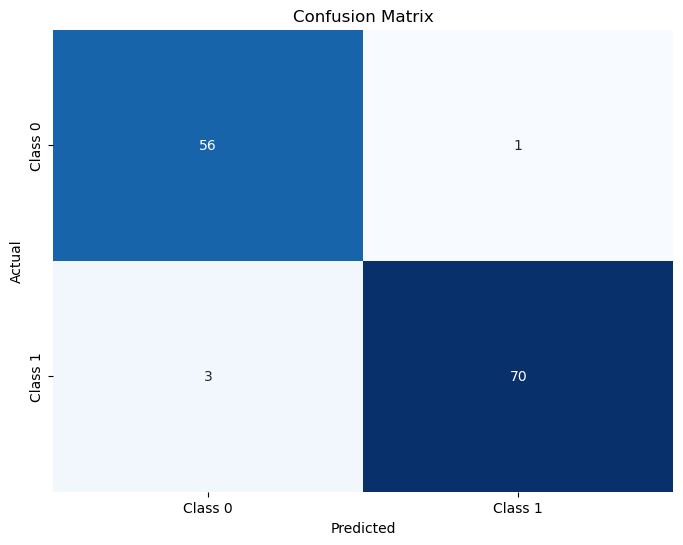

In [189]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

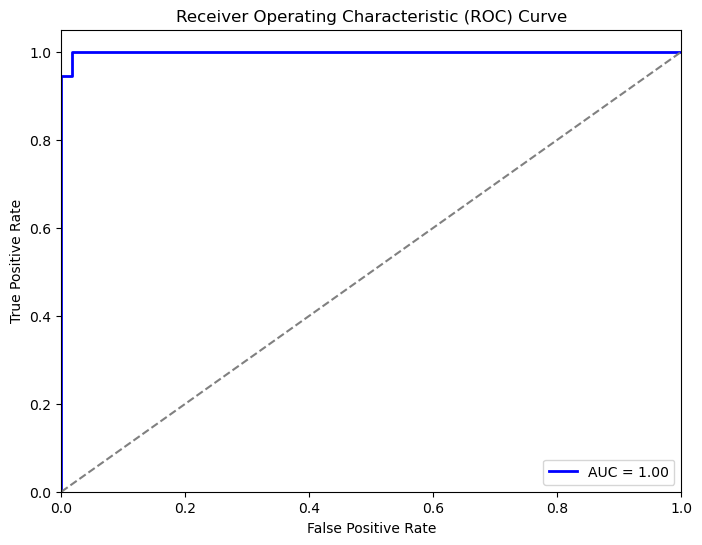

In [190]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

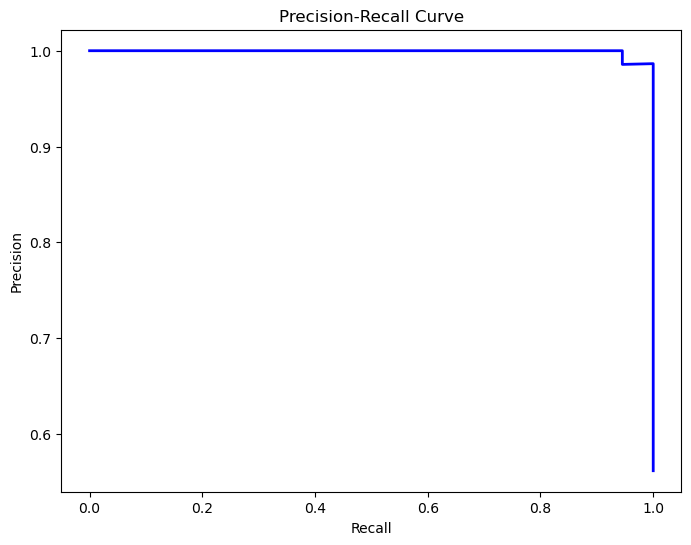

In [191]:

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()




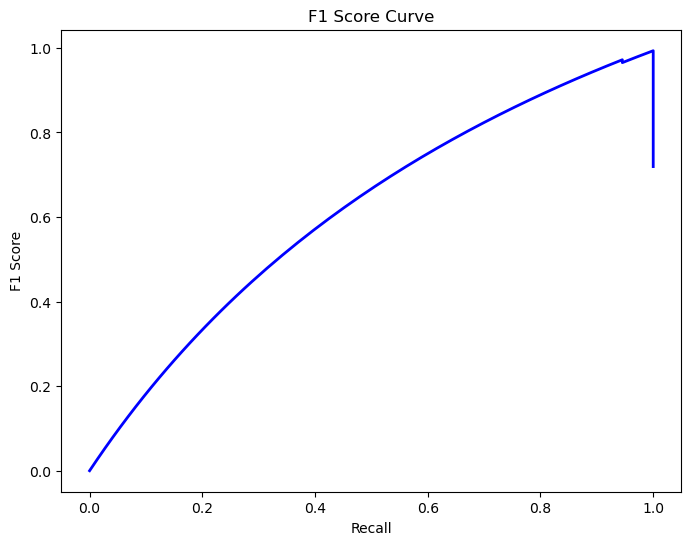

In [192]:
# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()

In [193]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/mlp_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/mlp_model.pkl


# Random forest

In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [223]:

# Initialize Random Forest classifier
model = RandomForestClassifier(n_estimators=100,random_state=42)

# Fit the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


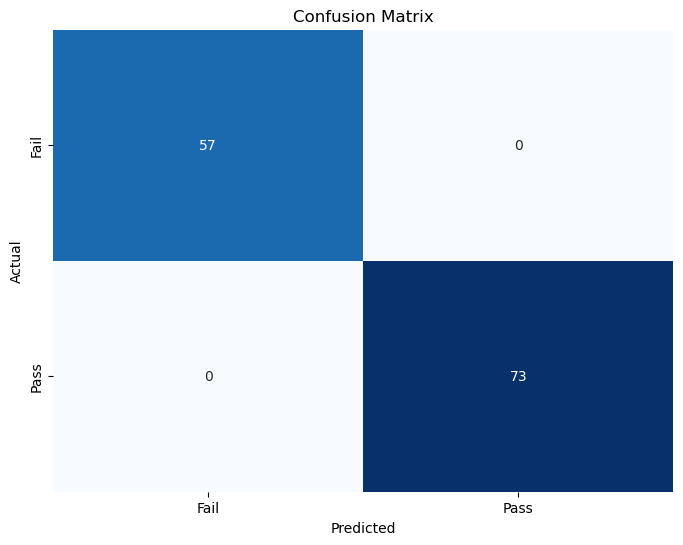

In [224]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


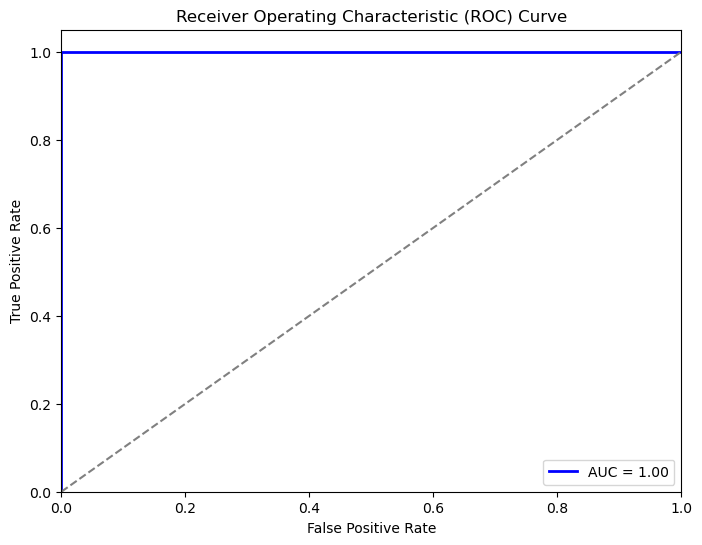

In [225]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [226]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')


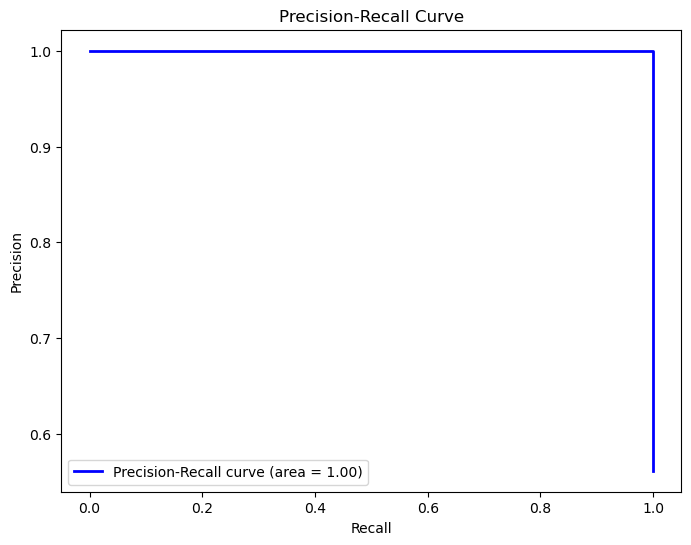

In [227]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = roc_auc_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

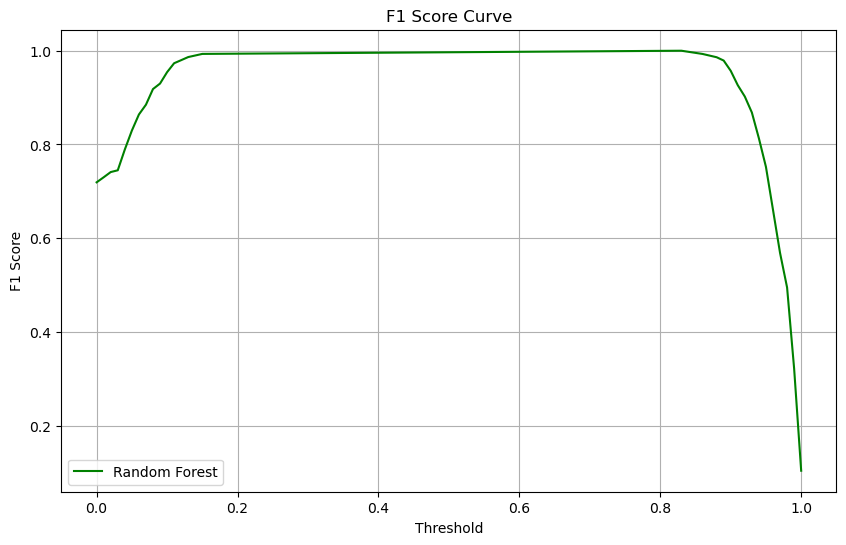

In [228]:
# Calculate Precision-Recall and F1-Score for Random Forest
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_test, y_prob)
f1_scores_forest = 2 * (precision_forest * recall_forest) / (precision_forest + recall_forest)

# Plot F1-Score Curve
plt.figure(figsize=(10, 6))


# Plot for Random Forest
plt.plot(thresholds_forest, f1_scores_forest[:-1], label='Random Forest', color='green')

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend()
plt.grid(True)
plt.show()


In [229]:
model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/random_forest_model.pkl


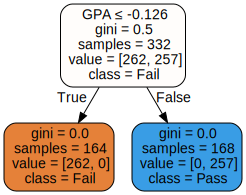

In [230]:
from sklearn.tree import export_graphviz
import graphviz

# Extract a single decision tree from the random forest
# Note: Random forests contain multiple trees; here we use the first one
tree = model.estimators_[0]

# Export the decision tree to a DOT file
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a graph from the DOT file
graph = graphviz.Source(dot_data)

# Render and display the graph
graph.render('random_forest_tree', format='png', cleanup=False)
graph

# SVM

In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [201]:

# Initialize SVM classifier
model = SVC(kernel='rbf', random_state=42, probability=True)

# Fit the model
model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Training Accuracy: 0.99
Testing Accuracy: 0.95
Confusion Matrix:
[[55  2]
 [ 4 69]]


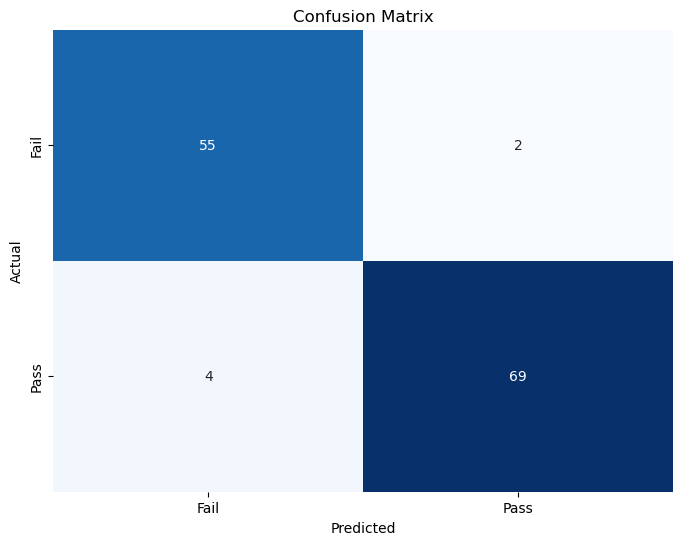

In [202]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

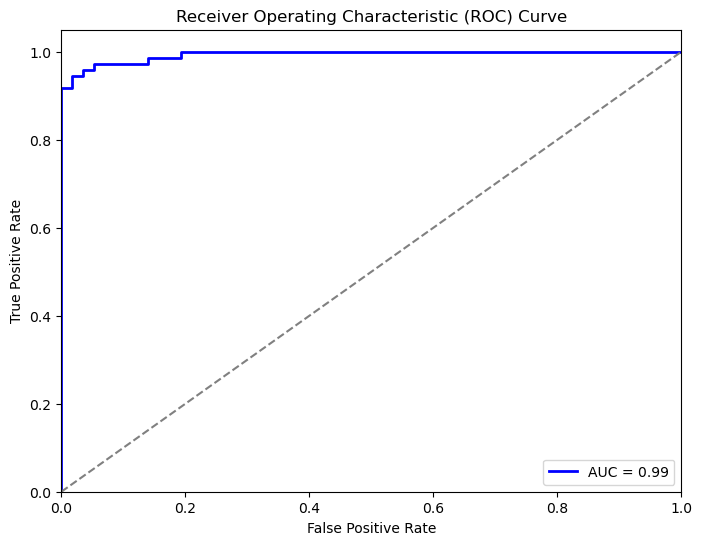

In [203]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [204]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/svm_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')



Model saved at ML_MODEL/svm_model.pkl


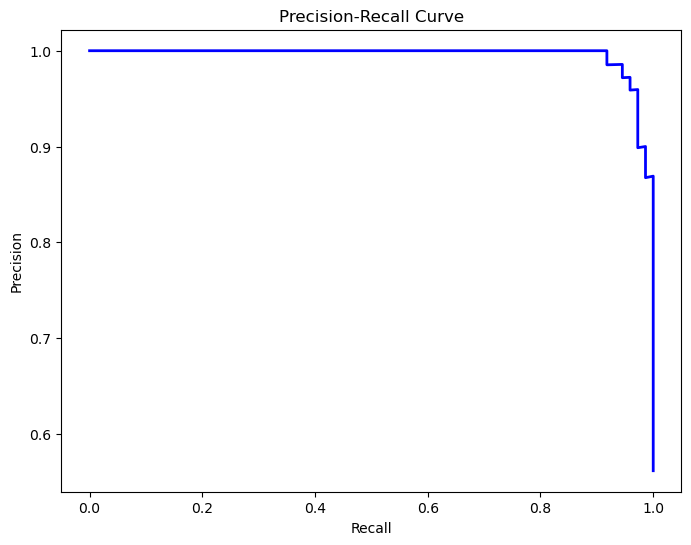

In [205]:

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

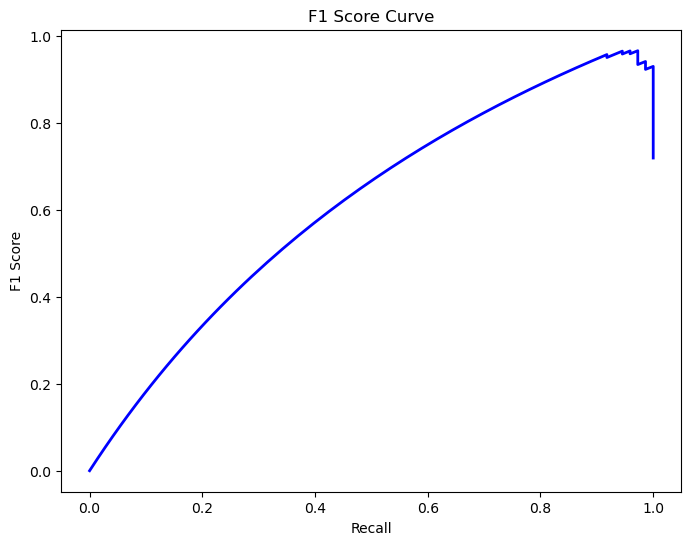

In [206]:
# Plot F1 Score Curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
plt.figure(figsize=(8, 6))
plt.plot(recall, f1_scores, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.show()



In [207]:
# Save the model
model_path = 'ML_MODEL/svc_model.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to ML_MODEL/svc_model.pkl
